In [4]:
# Standard libraries Imports
import json
# Third party Imports
import pandas as pd
from ydata_profiling import ProfileReport # Quick EDA
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
# Local imports
from src.utils import count_plot_percentage
from src.utils import one_hot_encoding


In [5]:
data = pd.read_csv("data/Citywide_Mobility_Survey_-_Person_Survey_2019.csv")

In [6]:
data.head()

,hh_id,weight,cms_zone,survey_mode,person_id,person_num,is_participant,num_days,num_days_complete,num_trips,...,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
0,191546322,0.00000,Inner Brooklyn,1,19154632203,3,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
1,191546322,0.00000,Inner Brooklyn,1,19154632202,2,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
2,191546322,212.12729,Inner Brooklyn,1,19154632201,1,1,7.0,7.0,23.0,...,1,0,0,0,0,0,0,0,0,1
3,19241657,0.00000,Middle Queens,1,1924165703,3,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995
4,19241657,0.00000,Middle Queens,1,1924165702,2,0,NaN,NaN,NaN,...,995,995,995,995,995,995,995,995,995,995


* Observe having nominal data(categoricals represented by numbers). s.t. is_participant, race, and disability columns
* Observe having NULL values

In [7]:
# Quick EDA
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
profile = ProfileReport(data, explorative=True)

#Saving results to a HTML file
profile.to_file("output.html")

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\DELL\AppData\Local\Temp\ipykernel_17576\3818842353.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Summarize dataset:  97%|█████████▋| 166/172 [00:06<00:00, 102.64it/s, Calculate auto correlation]                  d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = new

In [7]:
data.describe()

,hh_id,weight,survey_mode,person_id,person_num,is_participant,num_days,num_days_complete,num_trips,num_walk_trips,...,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
count,8.286000e+03,8286.000000,8286.000000,8.286000e+03,8286.000000,8286.000000,3346.000000,3346.000000,3346.000000,3346.000000,...,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000,8286.000000
mean,2.468398e+07,804.993000,1.246681,2.468398e+09,2.146633,0.403814,5.475792,4.334130,25.540646,10.004782,...,638.420468,638.613444,638.453295,617.448467,617.443036,617.467053,617.445571,617.442674,617.449071,617.774922
std,2.974500e+07,4395.258128,0.496917,2.974500e+09,1.317302,0.490691,2.612294,2.524525,21.900434,12.091553,...,477.339270,477.081235,477.295392,482.943289,482.950227,482.919543,482.946990,482.950690,482.942518,482.525910
min,1.900024e+07,0.000000,1.000000,1.900024e+09,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.926343e+07,0.000000,1.000000,1.926343e+09,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.951784e+07,0.000000,1.000000,1.951784e+09,2.000000,0.000000,7.000000,5.000000,24.000000,5.000000,...,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
75%,1.979496e+07,199.885270,1.000000,1.979496e+09,3.000000,1.000000,7.000000,7.000000,41.000000,16.000000,...,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
max,1.999892e+08,88819.119060,3.000000,1.999892e+10,11.000000,1.000000,7.000000,7.000000,178.000000,93.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000


Though most of the features are nominal, but observe for quantitative data(jobs_count for example) that missing values, e.g., -9998 and 995, are affecting the results

In [8]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Columns: 165 entries, hh_id to disability_none
dtypes: float64(20), int64(140), object(5)
memory usage: 10.4+ MB


* Observe most of the values for 'work_park_amount_day', 'work_park_amount_week', 'work_park_amount_month' features are NULL
* and 'work_cms_zone' have more than 60% NULLs
* Observe 3 data types, will detect if we have more than these 3

In [9]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

* Observe having 'O' datatype, let's detect it

In [10]:
data.select_dtypes(include=['O']).columns

Index(['cms_zone', 'first_travel_date', 'last_travel_date', 'work_cms_zone',
       'school_cms_zone'],
      dtype='object')

In [11]:
data.select_dtypes(['O'])

,cms_zone,first_travel_date,last_travel_date,work_cms_zone,school_cms_zone
0,Inner Brooklyn,06/24/2019,06/30/2019,NaN,NaN
1,Inner Brooklyn,06/24/2019,06/30/2019,NaN,NaN
2,Inner Brooklyn,06/24/2019,06/30/2019,NaN,NaN
3,Middle Queens,05/29/2019,06/04/2019,NaN,NaN
4,Middle Queens,05/29/2019,06/04/2019,NaN,NaN
...,...,...,...,...,...
8281,Staten Island,06/15/2019,06/15/2019,NaN,NaN
8282,Staten Island,06/03/2019,06/03/2019,Staten Island,NaN
8283,Staten Island,06/03/2019,06/03/2019,NaN,NaN
8284,Staten Island,06/03/2019,06/03/2019,NaN,NaN


In [12]:
null_percentage = data.isna().mean().sort_values(ascending=False)[data.isna().sum()>0] 

In [13]:
null_percentage = data.isna().sum().apply(lambda x:x/data.shape[0]*100).sort_values(ascending=False)[data.isna().sum()>0] 

In [ ]:
#TODO: Check Balance, for example
for indx, column in enumerate(data):
    print(f'Value counts - {column}')
    display(data[column].value_counts())
    print('-' * 30)

Value counts - cms_zone


Northern Bronx        351
Staten Island         318
Outer Queens          308
Southern Bronx        291
Outer Brooklyn        270
Middle Queens         264
Inner Queens          241
Northern Manhattan    229
Inner Brooklyn        214
Manhattan Core        206
Name: cms_zone, dtype: int64

------------------------------
Value counts - smartphone_type


2    1334
1     965
0     377
3      16
Name: smartphone_type, dtype: int64

------------------------------
Value counts - jobs_count


1.0      1589
995.0     868
2.0       171
3.0        46
6.0        12
4.0         4
5.0         2
Name: jobs_count, dtype: int64

------------------------------
Value counts - bike_num_days


995    1573
0       973
1        54
2        32
3        24
4        12
5         9
7         9
6         6
Name: bike_num_days, dtype: int64

------------------------------
Value counts - survey_mode_Call center


0    2531
1     161
Name: survey_mode_Call center, dtype: int64

------------------------------
Value counts - survey_mode_rMove


1    1842
0     850
Name: survey_mode_rMove, dtype: int64

------------------------------
Value counts - survey_mode_rSurvey


0    2003
1     689
Name: survey_mode_rSurvey, dtype: int64

------------------------------
Value counts - is_participant_Selected


1    2692
Name: is_participant_Selected, dtype: int64

------------------------------
Value counts - age_18-24


0    2504
1     188
Name: age_18-24, dtype: int64

------------------------------
Value counts - age_25-34


0    2153
1     539
Name: age_25-34, dtype: int64

------------------------------
Value counts - age_35-44


0    2169
1     523
Name: age_35-44, dtype: int64

------------------------------
Value counts - age_45-54


0    2197
1     495
Name: age_45-54, dtype: int64

------------------------------
Value counts - age_55-64


0    2211
1     481
Name: age_55-64, dtype: int64

------------------------------
Value counts - age_65-74


0    2368
1     324
Name: age_65-74, dtype: int64

------------------------------
Value counts - age_75-84


0    2574
1     118
Name: age_75-84, dtype: int64

------------------------------
Value counts - age_85 or older


0    2668
1      24
Name: age_85 or older, dtype: int64

------------------------------
Value counts - employment_Employed full-time


0    1350
1    1342
Name: employment_Employed full-time, dtype: int64

------------------------------
Value counts - employment_Employed part-time


0    2445
1     247
Name: employment_Employed part-time, dtype: int64

------------------------------
Value counts - employment_Not currently employed


0    1824
1     868
Name: employment_Not currently employed, dtype: int64

------------------------------
Value counts - employment_Primarily self-employed


0    2517
1     175
Name: employment_Primarily self-employed, dtype: int64

------------------------------
Value counts - employment_Unpaid volunteer or intern


0    2632
1      60
Name: employment_Unpaid volunteer or intern, dtype: int64

------------------------------
Value counts - worker_Employed


1    1824
0     868
Name: worker_Employed, dtype: int64

------------------------------
Value counts - worker_Not employed


0    1824
1     868
Name: worker_Not employed, dtype: int64

------------------------------
Value counts - student_Full-time student


0    2504
1     188
Name: student_Full-time student, dtype: int64

------------------------------
Value counts - student_Not a student


1    2409
0     283
Name: student_Not a student, dtype: int64

------------------------------
Value counts - student_Part-time student


0    2597
1      95
Name: student_Part-time student, dtype: int64

------------------------------
Value counts - vehicle_A carshare vehicle


0    2689
1       3
Name: vehicle_A carshare vehicle, dtype: int64

------------------------------
Value counts - vehicle_HH vehicle 1


0    1631
1    1061
Name: vehicle_HH vehicle 1, dtype: int64

------------------------------
Value counts - vehicle_HH vehicle 2


0    2554
1     138
Name: vehicle_HH vehicle 2, dtype: int64

------------------------------
Value counts - vehicle_HH vehicle 3


0    2679
1      13
Name: vehicle_HH vehicle 3, dtype: int64

------------------------------
Value counts - vehicle_HH vehicle 4


0    2691
1       1
Name: vehicle_HH vehicle 4, dtype: int64

------------------------------
Value counts - vehicle_HH vehicle 5


0    2691
1       1
Name: vehicle_HH vehicle 5, dtype: int64

------------------------------
Value counts - vehicle_HH vehicle 7


0    2691
1       1
Name: vehicle_HH vehicle 7, dtype: int64

------------------------------
Value counts - vehicle_None


0    2547
1     145
Name: vehicle_None, dtype: int64

------------------------------
Value counts - vehicle_Other


0    2666
1      26
Name: vehicle_Other, dtype: int64

------------------------------
Value counts - vehicle_skip logic


0    1389
1    1303
Name: vehicle_skip logic, dtype: int64

------------------------------
Value counts - telework_freq_1 day a week


0    2582
1     110
Name: telework_freq_1 day a week, dtype: int64

------------------------------
Value counts - telework_freq_1-3 days a month


0    2555
1     137
Name: telework_freq_1-3 days a month, dtype: int64

------------------------------
Value counts - telework_freq_2-3 days a week


0    2563
1     129
Name: telework_freq_2-3 days a week, dtype: int64

------------------------------
Value counts - telework_freq_4 days a week


0    2642
1      50
Name: telework_freq_4 days a week, dtype: int64

------------------------------
Value counts - telework_freq_5 days a week


0    2561
1     131
Name: telework_freq_5 days a week, dtype: int64

------------------------------
Value counts - telework_freq_6-7 days a week


0    2646
1      46
Name: telework_freq_6-7 days a week, dtype: int64

------------------------------
Value counts - telework_freq_Less than monthly


0    2503
1     189
Name: telework_freq_Less than monthly, dtype: int64

------------------------------
Value counts - telework_freq_Never


0    1833
1     859
Name: telework_freq_Never, dtype: int64

------------------------------
Value counts - telework_freq_skip logic


0    1651
1    1041
Name: telework_freq_skip logic, dtype: int64

------------------------------
Value counts - missing_work_location_No


1    2547
0     145
Name: missing_work_location_No, dtype: int64

------------------------------
Value counts - missing_work_location_Yes


0    2547
1     145
Name: missing_work_location_Yes, dtype: int64

------------------------------
Value counts - work_mode_Any bus or shuttle


0    2470
1     222
Name: work_mode_Any bus or shuttle, dtype: int64

------------------------------
Value counts - work_mode_Any rail


0    1810
1     882
Name: work_mode_Any rail, dtype: int64

------------------------------
Value counts - work_mode_Any taxi or ride service


0    2667
1      25
Name: work_mode_Any taxi or ride service, dtype: int64

------------------------------
Value counts - work_mode_Bicycle


0    2663
1      29
Name: work_mode_Bicycle, dtype: int64

------------------------------
Value counts - work_mode_Ferry


0    2672
1      20
Name: work_mode_Ferry, dtype: int64

------------------------------
Value counts - work_mode_In a household vehicle


0    2341
1     351
Name: work_mode_In a household vehicle, dtype: int64

------------------------------
Value counts - work_mode_In other personal vehicle


0    2648
1      44
Name: work_mode_In other personal vehicle, dtype: int64

------------------------------
Value counts - work_mode_Other


0    2663
1      29
Name: work_mode_Other, dtype: int64

------------------------------
Value counts - work_mode_skip logic


0    1716
1     976
Name: work_mode_skip logic, dtype: int64

------------------------------
Value counts - work_mode_own_HH vehicle 1


0    2403
1     289
Name: work_mode_own_HH vehicle 1, dtype: int64

------------------------------
Value counts - work_mode_own_HH vehicle 2


0    2636
1      56
Name: work_mode_own_HH vehicle 2, dtype: int64

------------------------------
Value counts - work_mode_own_HH vehicle 3


0    2688
1       4
Name: work_mode_own_HH vehicle 3, dtype: int64

------------------------------
Value counts - work_mode_own_Other vehicle in household


0    2690
1       2
Name: work_mode_own_Other vehicle in household, dtype: int64

------------------------------
Value counts - work_mode_own_skip logic


1    2341
0     351
Name: work_mode_own_skip logic, dtype: int64

------------------------------
Value counts - work_park_location_On street parking


0    2564
1     128
Name: work_park_location_On street parking, dtype: int64

------------------------------
Value counts - work_park_location_Other


0    2687
1       5
Name: work_park_location_Other, dtype: int64

------------------------------
Value counts - work_park_location_Parking


0    2488
1     204
Name: work_park_location_Parking, dtype: int64

------------------------------
Value counts - work_park_location_skip logic


1    2341
0     351
Name: work_park_location_skip logic, dtype: int64

------------------------------
Value counts - work_park_pay_Employer offers discounted parking


0    2684
1       8
Name: work_park_pay_Employer offers discounted parking, dtype: int64

------------------------------
Value counts - work_park_pay_Employer pays ALL parking costs


0    2663
1      29
Name: work_park_pay_Employer pays ALL parking costs, dtype: int64

------------------------------
Value counts - work_park_pay_I personally pay some or all parking costs


0    2650
1      42
Name: work_park_pay_I personally pay some or all parking costs, dtype: int64

------------------------------
Value counts - work_park_pay_I personally pay some or all parking costs with a pre-tax transportation card


0    2683
1       9
Name: work_park_pay_I personally pay some or all parking costs with a pre-tax transportation card, dtype: int64

------------------------------
Value counts - work_park_pay_Parking is always free


0    2443
1     249
Name: work_park_pay_Parking is always free, dtype: int64

------------------------------
Value counts - work_park_pay_skip logic


1    2350
0     342
Name: work_park_pay_skip logic, dtype: int64

------------------------------
Value counts - work_vehicle_pass_period_Per


0    2640
1      52
Name: work_vehicle_pass_period_Per, dtype: int64

------------------------------
Value counts - work_vehicle_pass_period_skip logic


1    2633
0      59
Name: work_vehicle_pass_period_skip logic, dtype: int64

------------------------------
Value counts - work_mode_auto_Car from work


0    2672
1      20
Name: work_mode_auto_Car from work, dtype: int64

------------------------------
Value counts - work_mode_auto_Carpool


0    2690
1       2
Name: work_mode_auto_Carpool, dtype: int64

------------------------------
Value counts - work_mode_auto_Other vehicle


0    2682
1      10
Name: work_mode_auto_Other vehicle, dtype: int64

------------------------------
Value counts - work_mode_auto_Rental car


0    2691
1       1
Name: work_mode_auto_Rental car, dtype: int64

------------------------------
Value counts - work_mode_auto_skip logic


1    2648
0      44
Name: work_mode_auto_skip logic, dtype: int64

------------------------------
Value counts - work_mode_bus_Commuter Van


0    2691
1       1
Name: work_mode_bus_Commuter Van, dtype: int64

------------------------------
Value counts - work_mode_bus_Employer


0    2688
1       4
Name: work_mode_bus_Employer, dtype: int64

------------------------------
Value counts - work_mode_bus_Express bus


0    2613
1      79
Name: work_mode_bus_Express bus, dtype: int64

------------------------------
Value counts - work_mode_bus_Intercity bus


0    2691
1       1
Name: work_mode_bus_Intercity bus, dtype: int64

------------------------------
Value counts - work_mode_bus_Local bus


0    2571
1     121
Name: work_mode_bus_Local bus, dtype: int64

------------------------------
Value counts - work_mode_bus_Select Bus Service


0    2676
1      16
Name: work_mode_bus_Select Bus Service, dtype: int64

------------------------------
Value counts - work_mode_bus_skip logic


1    2470
0     222
Name: work_mode_bus_skip logic, dtype: int64

------------------------------
Value counts - work_mode_rail_Commuter rail


0    2658
1      34
Name: work_mode_rail_Commuter rail, dtype: int64

------------------------------
Value counts - work_mode_rail_Intercity rail


0    2689
1       3
Name: work_mode_rail_Intercity rail, dtype: int64

------------------------------
Value counts - work_mode_rail_Other rail


0    2684
1       8
Name: work_mode_rail_Other rail, dtype: int64

------------------------------
Value counts - work_mode_rail_PATH train


0    2687
1       5
Name: work_mode_rail_PATH train, dtype: int64

------------------------------
Value counts - work_mode_rail_Subway


0    1860
1     832
Name: work_mode_rail_Subway, dtype: int64

------------------------------
Value counts - work_mode_rail_skip logic


1    1810
0     882
Name: work_mode_rail_skip logic, dtype: int64

------------------------------
Value counts - work_mode_ferry_NYC Ferry


0    2691
1       1
Name: work_mode_ferry_NYC Ferry, dtype: int64

------------------------------
Value counts - work_mode_ferry_Staten Island Ferry


0    2673
1      19
Name: work_mode_ferry_Staten Island Ferry, dtype: int64

------------------------------
Value counts - work_mode_ferry_skip logic


1    2672
0      20
Name: work_mode_ferry_skip logic, dtype: int64

------------------------------
Value counts - work_mode_taxi_Green taxi


0    2691
1       1
Name: work_mode_taxi_Green taxi, dtype: int64

------------------------------
Value counts - work_mode_taxi_Other hired car service


0    2685
1       7
Name: work_mode_taxi_Other hired car service, dtype: int64

------------------------------
Value counts - work_mode_taxi_Yellow taxi


0    2690
1       2
Name: work_mode_taxi_Yellow taxi, dtype: int64

------------------------------
Value counts - work_mode_taxi_skip logic


1    2667
0      25
Name: work_mode_taxi_skip logic, dtype: int64

------------------------------
Value counts - work_mode_bike_Borrowed bicycle


0    2691
1       1
Name: work_mode_bike_Borrowed bicycle, dtype: int64

------------------------------
Value counts - work_mode_bike_Citi Bike


0    2688
1       4
Name: work_mode_bike_Citi Bike, dtype: int64

------------------------------
Value counts - work_mode_bike_Standard bicycle owned by my household


0    2668
1      24
Name: work_mode_bike_Standard bicycle owned by my household, dtype: int64

------------------------------
Value counts - work_mode_bike_skip logic


1    2663
0      29
Name: work_mode_bike_skip logic, dtype: int64

------------------------------
Value counts - work_bike_park_Bike rack


0    2686
1       6
Name: work_bike_park_Bike rack, dtype: int64

------------------------------
Value counts - work_bike_park_Bike-share designated docking station


0    2688
1       4
Name: work_bike_park_Bike-share designated docking station, dtype: int64

------------------------------
Value counts - work_bike_park_In a parking


0    2691
1       1
Name: work_bike_park_In a parking, dtype: int64

------------------------------
Value counts - work_bike_park_Locked to other object


0    2686
1       6
Name: work_bike_park_Locked to other object, dtype: int64

------------------------------
Value counts - work_bike_park_Other


0    2685
1       7
Name: work_bike_park_Other, dtype: int64

------------------------------
Value counts - work_bike_park_Secured bike room


0    2687
1       5
Name: work_bike_park_Secured bike room, dtype: int64

------------------------------
Value counts - work_bike_park_skip logic


1    2663
0      29
Name: work_bike_park_skip logic, dtype: int64

------------------------------
Value counts - work_mode_scooter_skip logic


1    2692
Name: work_mode_scooter_skip logic, dtype: int64

------------------------------
Value counts - work_scooter_park_skip logic


1    2692
Name: work_scooter_park_skip logic, dtype: int64

------------------------------
Value counts - missing_school_location_No


1    2533
0     159
Name: missing_school_location_No, dtype: int64

------------------------------
Value counts - missing_school_location_Yes


0    2533
1     159
Name: missing_school_location_Yes, dtype: int64

------------------------------
Value counts - kid_accompany_skip logic


1    2692
Name: kid_accompany_skip logic, dtype: int64

------------------------------
Value counts - school_mode_own_HH vehicle 1


0    2663
1      29
Name: school_mode_own_HH vehicle 1, dtype: int64

------------------------------
Value counts - school_mode_own_HH vehicle 2


0    2689
1       3
Name: school_mode_own_HH vehicle 2, dtype: int64

------------------------------
Value counts - school_mode_own_Other vehicle in household


0    2690
1       2
Name: school_mode_own_Other vehicle in household, dtype: int64

------------------------------
Value counts - school_mode_own_skip logic


1    2658
0      34
Name: school_mode_own_skip logic, dtype: int64

------------------------------
Value counts - school_park_location_On street parking


0    2678
1      14
Name: school_park_location_On street parking, dtype: int64

------------------------------
Value counts - school_park_location_Parking


0    2678
1      14
Name: school_park_location_Parking, dtype: int64

------------------------------
Value counts - school_park_location_skip logic


1    2658
0      34
Name: school_park_location_skip logic, dtype: int64

------------------------------
Value counts - school_vehicle_pass_period_Parking is


0    2677
1      15
Name: school_vehicle_pass_period_Parking is, dtype: int64

------------------------------
Value counts - school_vehicle_pass_period_Per


0    2679
1      13
Name: school_vehicle_pass_period_Per, dtype: int64

------------------------------
Value counts - school_vehicle_pass_period_skip logic


1    2664
0      28
Name: school_vehicle_pass_period_skip logic, dtype: int64

------------------------------
Value counts - school_mode_auto_Car from work


0    2690
1       2
Name: school_mode_auto_Car from work, dtype: int64

------------------------------
Value counts - school_mode_auto_Carpool


0    2690
1       2
Name: school_mode_auto_Carpool, dtype: int64

------------------------------
Value counts - school_mode_auto_Other vehicle


0    2691
1       1
Name: school_mode_auto_Other vehicle, dtype: int64

------------------------------
Value counts - school_mode_auto_skip logic


1    2687
0       5
Name: school_mode_auto_skip logic, dtype: int64

------------------------------
Value counts - school_mode_bus_Express bus


0    2688
1       4
Name: school_mode_bus_Express bus, dtype: int64

------------------------------
Value counts - school_mode_bus_Intercity bus


0    2691
1       1
Name: school_mode_bus_Intercity bus, dtype: int64

------------------------------
Value counts - school_mode_bus_Local bus


0    2661
1      31
Name: school_mode_bus_Local bus, dtype: int64

------------------------------
Value counts - school_mode_bus_Other private


0    2691
1       1
Name: school_mode_bus_Other private, dtype: int64

------------------------------
Value counts - school_mode_bus_School bus


0    2690
1       2
Name: school_mode_bus_School bus, dtype: int64

------------------------------
Value counts - school_mode_bus_Select Bus Service


0    2687
1       5
Name: school_mode_bus_Select Bus Service, dtype: int64

------------------------------
Value counts - school_mode_bus_skip logic


1    2648
0      44
Name: school_mode_bus_skip logic, dtype: int64

------------------------------
Value counts - school_mode_rail_Commuter rail


0    2689
1       3
Name: school_mode_rail_Commuter rail, dtype: int64

------------------------------
Value counts - school_mode_rail_Other rail 


0    2691
1       1
Name: school_mode_rail_Other rail , dtype: int64

------------------------------
Value counts - school_mode_rail_PATH train


0    2691
1       1
Name: school_mode_rail_PATH train, dtype: int64

------------------------------
Value counts - school_mode_rail_Subway


0    2572
1     120
Name: school_mode_rail_Subway, dtype: int64

------------------------------
Value counts - school_mode_rail_skip logic


1    2567
0     125
Name: school_mode_rail_skip logic, dtype: int64

------------------------------
Value counts - school_mode_ferry_Staten Island Ferry


0    2690
1       2
Name: school_mode_ferry_Staten Island Ferry, dtype: int64

------------------------------
Value counts - school_mode_ferry_skip logic


1    2690
0       2
Name: school_mode_ferry_skip logic, dtype: int64

------------------------------
Value counts - school_access_skip logic


1    2692
Name: school_access_skip logic, dtype: int64

------------------------------
Value counts - school_egress_skip logic


1    2692
Name: school_egress_skip logic, dtype: int64

------------------------------
Value counts - school_mode_taxi_skip logic


1    2688
0       4
Name: school_mode_taxi_skip logic, dtype: int64

------------------------------
Value counts - school_mode_bike_Citi Bike


0    2691
1       1
Name: school_mode_bike_Citi Bike, dtype: int64

------------------------------
Value counts - school_mode_bike_Standard bicycle owned by my household


0    2688
1       4
Name: school_mode_bike_Standard bicycle owned by my household, dtype: int64

------------------------------
Value counts - school_mode_bike_skip logic


1    2687
0       5
Name: school_mode_bike_skip logic, dtype: int64

------------------------------
Value counts - school_bike_park_Bike rack


0    2688
1       4
Name: school_bike_park_Bike rack, dtype: int64

------------------------------
Value counts - school_bike_park_Secured bike room


0    2691
1       1
Name: school_bike_park_Secured bike room, dtype: int64

------------------------------
Value counts - school_bike_park_skip logic


1    2687
0       5
Name: school_bike_park_skip logic, dtype: int64

------------------------------
Value counts - school_mode_scooter_skip logic


1    2692
Name: school_mode_scooter_skip logic, dtype: int64

------------------------------
Value counts - school_scooter_park_skip logic


1    2692
Name: school_scooter_park_skip logic, dtype: int64

------------------------------
Value counts - no_bike_nyc_bike_lanes_Not selected


1    1483
0    1209
Name: no_bike_nyc_bike_lanes_Not selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_bike_lanes_Selected


0    2238
1     454
Name: no_bike_nyc_bike_lanes_Selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_bike_lanes_skip logic


0    1937
1     755
Name: no_bike_nyc_bike_lanes_skip logic, dtype: int64

------------------------------
Value counts - no_bike_nyc_paving_Not selected


1    1580
0    1112
Name: no_bike_nyc_paving_Not selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_paving_Selected


0    2335
1     357
Name: no_bike_nyc_paving_Selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_paving_skip logic


0    1937
1     755
Name: no_bike_nyc_paving_skip logic, dtype: int64

------------------------------
Value counts - no_bike_nyc_storage_Not selected


1    1596
0    1096
Name: no_bike_nyc_storage_Not selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_storage_Selected


0    2351
1     341
Name: no_bike_nyc_storage_Selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_storage_skip logic


0    1937
1     755
Name: no_bike_nyc_storage_skip logic, dtype: int64

------------------------------
Value counts - no_bike_nyc_long_trips_Not selected


1    1560
0    1132
Name: no_bike_nyc_long_trips_Not selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_long_trips_Selected


0    2315
1     377
Name: no_bike_nyc_long_trips_Selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_long_trips_skip logic


0    1937
1     755
Name: no_bike_nyc_long_trips_skip logic, dtype: int64

------------------------------
Value counts - no_bike_nyc_showers_Not selected


1    1788
0     904
Name: no_bike_nyc_showers_Not selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_showers_Selected


0    2543
1     149
Name: no_bike_nyc_showers_Selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_showers_skip logic


0    1937
1     755
Name: no_bike_nyc_showers_skip logic, dtype: int64

------------------------------
Value counts - no_bike_nyc_modes_Not selected


0    1539
1    1153
Name: no_bike_nyc_modes_Not selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_modes_Selected


0    1908
1     784
Name: no_bike_nyc_modes_Selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_modes_skip logic


0    1937
1     755
Name: no_bike_nyc_modes_skip logic, dtype: int64

------------------------------
Value counts - no_bike_nyc_unable_Not selected


1    1759
0     933
Name: no_bike_nyc_unable_Not selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_unable_Selected


0    2514
1     178
Name: no_bike_nyc_unable_Selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_unable_skip logic


0    1937
1     755
Name: no_bike_nyc_unable_skip logic, dtype: int64

------------------------------
Value counts - no_bike_nyc_other_Not selected


1    1511
0    1181
Name: no_bike_nyc_other_Not selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_other_Selected


0    2266
1     426
Name: no_bike_nyc_other_Selected, dtype: int64

------------------------------
Value counts - no_bike_nyc_other_skip logic


0    1937
1     755
Name: no_bike_nyc_other_skip logic, dtype: int64

------------------------------
Value counts - citi_bike_freq_1 day a week


0    2690
1       2
Name: citi_bike_freq_1 day a week, dtype: int64

------------------------------
Value counts - citi_bike_freq_1-3 days a month


0    2683
1       9
Name: citi_bike_freq_1-3 days a month, dtype: int64

------------------------------
Value counts - citi_bike_freq_2-3 days a week


0    2683
1       9
Name: citi_bike_freq_2-3 days a week, dtype: int64

------------------------------
Value counts - citi_bike_freq_4 days a week


0    2690
1       2
Name: citi_bike_freq_4 days a week, dtype: int64

------------------------------
Value counts - citi_bike_freq_5 days a week


0    2690
1       2
Name: citi_bike_freq_5 days a week, dtype: int64

------------------------------
Value counts - citi_bike_freq_6-7 days a week


0    2689
1       3
Name: citi_bike_freq_6-7 days a week, dtype: int64

------------------------------
Value counts - citi_bike_freq_Less than monthly


0    2644
1      48
Name: citi_bike_freq_Less than monthly, dtype: int64

------------------------------
Value counts - citi_bike_freq_Never


0    2686
1       6
Name: citi_bike_freq_Never, dtype: int64

------------------------------
Value counts - citi_bike_freq_skip logic


1    2611
0      81
Name: citi_bike_freq_skip logic, dtype: int64

------------------------------
Value counts - jump_freq_2-3 days a week


0    2691
1       1
Name: jump_freq_2-3 days a week, dtype: int64

------------------------------
Value counts - jump_freq_Less than monthly


0    2689
1       3
Name: jump_freq_Less than monthly, dtype: int64

------------------------------
Value counts - jump_freq_skip logic


1    2688
0       4
Name: jump_freq_skip logic, dtype: int64

------------------------------
Value counts - lime_freq_1-3 days a month


0    2691
1       1
Name: lime_freq_1-3 days a month, dtype: int64

------------------------------
Value counts - lime_freq_Less than monthly


0    2687
1       5
Name: lime_freq_Less than monthly, dtype: int64

------------------------------
Value counts - lime_freq_Never


0    2690
1       2
Name: lime_freq_Never, dtype: int64

------------------------------
Value counts - lime_freq_skip logic


1    2684
0       8
Name: lime_freq_skip logic, dtype: int64

------------------------------
Value counts - tnc_freq_1 day a week


0    2564
1     128
Name: tnc_freq_1 day a week, dtype: int64

------------------------------
Value counts - tnc_freq_1-3 days a month


0    2255
1     437
Name: tnc_freq_1-3 days a month, dtype: int64

------------------------------
Value counts - tnc_freq_2-3 days a week


0    2539
1     153
Name: tnc_freq_2-3 days a week, dtype: int64

------------------------------
Value counts - tnc_freq_4 days a week


0    2672
1      20
Name: tnc_freq_4 days a week, dtype: int64

------------------------------
Value counts - tnc_freq_5 days a week


0    2675
1      17
Name: tnc_freq_5 days a week, dtype: int64

------------------------------
Value counts - tnc_freq_6-7 days a week


0    2674
1      18
Name: tnc_freq_6-7 days a week, dtype: int64

------------------------------
Value counts - tnc_freq_Less than monthly


0    1973
1     719
Name: tnc_freq_Less than monthly, dtype: int64

------------------------------
Value counts - tnc_freq_Never


0    2659
1      33
Name: tnc_freq_Never, dtype: int64

------------------------------
Value counts - tnc_freq_skip logic


0    1525
1    1167
Name: tnc_freq_skip logic, dtype: int64

------------------------------
Value counts - tnc_purpose_Attended


0    2687
1       5
Name: tnc_purpose_Attended, dtype: int64

------------------------------
Value counts - tnc_purpose_Dine


0    2604
1      88
Name: tnc_purpose_Dine, dtype: int64

------------------------------
Value counts - tnc_purpose_Drop


0    2645
1      47
Name: tnc_purpose_Drop, dtype: int64

------------------------------
Value counts - tnc_purpose_Exercise


0    2690
1       2
Name: tnc_purpose_Exercise, dtype: int64

------------------------------
Value counts - tnc_purpose_Go


0    2637
1      55
Name: tnc_purpose_Go, dtype: int64

------------------------------
Value counts - tnc_purpose_Go home


0    2117
1     575
Name: tnc_purpose_Go home, dtype: int64

------------------------------
Value counts - tnc_purpose_Go to


0    2510
1     182
Name: tnc_purpose_Go to, dtype: int64

------------------------------
Value counts - tnc_purpose_Other reason


0    2542
1     150
Name: tnc_purpose_Other reason, dtype: int64

------------------------------
Value counts - tnc_purpose_skip logic


0    1525
1    1167
Name: tnc_purpose_skip logic, dtype: int64

------------------------------
Value counts - tnc_mode_Any bus or shuttle


0    2528
1     164
Name: tnc_mode_Any bus or shuttle, dtype: int64

------------------------------
Value counts - tnc_mode_Any rail


0    2222
1     470
Name: tnc_mode_Any rail, dtype: int64

------------------------------
Value counts - tnc_mode_Any taxi or car service


0    2203
1     489
Name: tnc_mode_Any taxi or car service, dtype: int64

------------------------------
Value counts - tnc_mode_Bicycle


0    2687
1       5
Name: tnc_mode_Bicycle, dtype: int64

------------------------------
Value counts - tnc_mode_Ferry


0    2686
1       6
Name: tnc_mode_Ferry, dtype: int64

------------------------------
Value counts - tnc_mode_In a household vehicle


0    2417
1     275
Name: tnc_mode_In a household vehicle, dtype: int64

------------------------------
Value counts - tnc_mode_In other personal vehicle


0    2658
1      34
Name: tnc_mode_In other personal vehicle, dtype: int64

------------------------------
Value counts - tnc_mode_Other


0    2662
1      30
Name: tnc_mode_Other, dtype: int64

------------------------------
Value counts - tnc_mode_skip logic


0    1525
1    1167
Name: tnc_mode_skip logic, dtype: int64

------------------------------
Value counts - tnc_mode_auto_Car from work


0    2690
1       2
Name: tnc_mode_auto_Car from work, dtype: int64

------------------------------
Value counts - tnc_mode_auto_Carpool


0    2691
1       1
Name: tnc_mode_auto_Carpool, dtype: int64

------------------------------
Value counts - tnc_mode_auto_Carshare service


0    2689
1       3
Name: tnc_mode_auto_Carshare service, dtype: int64

------------------------------
Value counts - tnc_mode_auto_Other vehicle


0    2678
1      14
Name: tnc_mode_auto_Other vehicle, dtype: int64

------------------------------
Value counts - tnc_mode_auto_Rental car


0    2690
1       2
Name: tnc_mode_auto_Rental car, dtype: int64

------------------------------
Value counts - tnc_mode_auto_skip logic


1    2658
0      34
Name: tnc_mode_auto_skip logic, dtype: int64

------------------------------
Value counts - tnc_mode_taxi_Green taxi


0    2653
1      39
Name: tnc_mode_taxi_Green taxi, dtype: int64

------------------------------
Value counts - tnc_mode_taxi_Other hired car service


0    2471
1     221
Name: tnc_mode_taxi_Other hired car service, dtype: int64

------------------------------
Value counts - tnc_mode_taxi_Yellow taxi


0    2463
1     229
Name: tnc_mode_taxi_Yellow taxi, dtype: int64

------------------------------
Value counts - tnc_mode_taxi_skip logic


1    2203
0     489
Name: tnc_mode_taxi_skip logic, dtype: int64

------------------------------
Value counts - tnc_mode_bus_Express bus


0    2674
1      18
Name: tnc_mode_bus_Express bus, dtype: int64

------------------------------
Value counts - tnc_mode_bus_Local bus


0    2560
1     132
Name: tnc_mode_bus_Local bus, dtype: int64

------------------------------
Value counts - tnc_mode_bus_Other bus


0    2691
1       1
Name: tnc_mode_bus_Other bus, dtype: int64

------------------------------
Value counts - tnc_mode_bus_Other private


0    2689
1       3
Name: tnc_mode_bus_Other private, dtype: int64

------------------------------
Value counts - tnc_mode_bus_Select Bus Service


0    2684
1       8
Name: tnc_mode_bus_Select Bus Service, dtype: int64

------------------------------
Value counts - tnc_mode_bus_skip logic


1    2528
0     164
Name: tnc_mode_bus_skip logic, dtype: int64

------------------------------
Value counts - tnc_mode_rail_Commuter rail


0    2687
1       5
Name: tnc_mode_rail_Commuter rail, dtype: int64

------------------------------
Value counts - tnc_mode_rail_Intercity rail


0    2691
1       1
Name: tnc_mode_rail_Intercity rail, dtype: int64

------------------------------
Value counts - tnc_mode_rail_PATH train


0    2691
1       1
Name: tnc_mode_rail_PATH train, dtype: int64

------------------------------
Value counts - tnc_mode_rail_Subway


0    2229
1     463
Name: tnc_mode_rail_Subway, dtype: int64

------------------------------
Value counts - tnc_mode_rail_skip logic


1    2222
0     470
Name: tnc_mode_rail_skip logic, dtype: int64

------------------------------
Value counts - tnc_mode_ferry_NYC Ferry


0    2688
1       4
Name: tnc_mode_ferry_NYC Ferry, dtype: int64

------------------------------
Value counts - tnc_mode_ferry_Staten Island Ferry


0    2690
1       2
Name: tnc_mode_ferry_Staten Island Ferry, dtype: int64

------------------------------
Value counts - tnc_mode_ferry_skip logic


1    2686
0       6
Name: tnc_mode_ferry_skip logic, dtype: int64

------------------------------
Value counts - tnc_mode_bike_Standard bicycle owned by my household


0    2687
1       5
Name: tnc_mode_bike_Standard bicycle owned by my household, dtype: int64

------------------------------
Value counts - tnc_mode_bike_skip logic


1    2687
0       5
Name: tnc_mode_bike_skip logic, dtype: int64

------------------------------
Value counts - tnc_mode_scooter_Personal scooter or moped


0    2691
1       1
Name: tnc_mode_scooter_Personal scooter or moped, dtype: int64

------------------------------
Value counts - tnc_mode_scooter_skip logic


1    2691
0       1
Name: tnc_mode_scooter_skip logic, dtype: int64

------------------------------
Value counts - packages_distance_1-2 blocks


0    2608
1      84
Name: packages_distance_1-2 blocks, dtype: int64

------------------------------
Value counts - packages_distance_11-20 blocks


0    2670
1      22
Name: packages_distance_11-20 blocks, dtype: int64

------------------------------
Value counts - packages_distance_3-5 blocks


0    2545
1     147
Name: packages_distance_3-5 blocks, dtype: int64

------------------------------
Value counts - packages_distance_6-10 blocks


0    2614
1      78
Name: packages_distance_6-10 blocks, dtype: int64

------------------------------
Value counts - packages_distance_Less than 1 block


0    2652
1      40
Name: packages_distance_Less than 1 block, dtype: int64

------------------------------
Value counts - packages_distance_More than 20 blocks


0    2654
1      38
Name: packages_distance_More than 20 blocks, dtype: int64

------------------------------
Value counts - packages_distance_skip logic


1    2283
0     409
Name: packages_distance_skip logic, dtype: int64

------------------------------
Value counts - gender_Female


1    1499
0    1193
Name: gender_Female, dtype: int64

------------------------------
Value counts - gender_Male


0    1576
1    1116
Name: gender_Male, dtype: int64

------------------------------
Value counts - gender_Non-binary


0    2680
1      12
Name: gender_Non-binary, dtype: int64

------------------------------
Value counts - gender_Prefer not to


0    2629
1      63
Name: gender_Prefer not to, dtype: int64

------------------------------
Value counts - ethnicity_Prefer not to


0    2495
1     197
Name: ethnicity_Prefer not to, dtype: int64

------------------------------
Value counts - race_american_indian_Not selected


1    2327
0     365
Name: race_american_indian_Not selected, dtype: int64

------------------------------
Value counts - race_american_indian_Selected


0    2643
1      49
Name: race_american_indian_Selected, dtype: int64

------------------------------
Value counts - race_asian_Not selected


1    1990
0     702
Name: race_asian_Not selected, dtype: int64

------------------------------
Value counts - race_asian_Selected


0    2306
1     386
Name: race_asian_Selected, dtype: int64

------------------------------
Value counts - race_black_Not selected


1    1881
0     811
Name: race_black_Not selected, dtype: int64

------------------------------
Value counts - race_black_Selected


0    2197
1     495
Name: race_black_Selected, dtype: int64

------------------------------
Value counts - race_native_hawaiian_Not selected


1    2357
0     335
Name: race_native_hawaiian_Not selected, dtype: int64

------------------------------
Value counts - race_native_hawaiian_Selected


0    2673
1      19
Name: race_native_hawaiian_Selected, dtype: int64

------------------------------
Value counts - race_white_Not selected


0    1617
1    1075
Name: race_white_Not selected, dtype: int64

------------------------------
Value counts - race_white_Selected


0    1391
1    1301
Name: race_white_Selected, dtype: int64

------------------------------
Value counts - race_other_Not selected


1    2147
0     545
Name: race_other_Not selected, dtype: int64

------------------------------
Value counts - race_other_Selected


0    2463
1     229
Name: race_other_Selected, dtype: int64

------------------------------
Value counts - disability_hearing_Not selected


1    2445
0     247
Name: disability_hearing_Not selected, dtype: int64

------------------------------
Value counts - disability_hearing_Selected


0    2618
1      74
Name: disability_hearing_Selected, dtype: int64

------------------------------
Value counts - disability_seeing_Not selected


1    2487
0     205
Name: disability_seeing_Not selected, dtype: int64

------------------------------
Value counts - disability_seeing_Selected


0    2660
1      32
Name: disability_seeing_Selected, dtype: int64

------------------------------
Value counts - disability_walking_Not selected


1    2317
0     375
Name: disability_walking_Not selected, dtype: int64

------------------------------
Value counts - disability_walking_Selected


0    2490
1     202
Name: disability_walking_Selected, dtype: int64

------------------------------
Value counts - disability_mobility_Not selected


1    2473
0     219
Name: disability_mobility_Not selected, dtype: int64

------------------------------
Value counts - disability_mobility_Selected


0    2646
1      46
Name: disability_mobility_Selected, dtype: int64

------------------------------
Value counts - disability_dressing_Not selected


1    2490
0     202
Name: disability_dressing_Not selected, dtype: int64

------------------------------
Value counts - disability_dressing_Selected


0    2663
1      29
Name: disability_dressing_Selected, dtype: int64

------------------------------
Value counts - disability_concentrating_Not selected


1    2449
0     243
Name: disability_concentrating_Not selected, dtype: int64

------------------------------
Value counts - disability_concentrating_Selected


0    2622
1      70
Name: disability_concentrating_Selected, dtype: int64

------------------------------
Value counts - disability_none_Not selected


0    2381
1     311
Name: disability_none_Not selected, dtype: int64

------------------------------
Value counts - disability_none_Selected


1    2208
0     484
Name: disability_none_Selected, dtype: int64

------------------------------


In [14]:
data['cms_zone'].value_counts()

Northern Bronx        1032
Staten Island         1024
Outer Queens           975
Southern Bronx         902
Middle Queens          835
Outer Brooklyn         822
Inner Brooklyn         767
Inner Queens           730
Northern Manhattan     657
Manhattan Core         542
Name: cms_zone, dtype: int64

In [15]:
print(data['work_cms_zone'].value_counts().sum())
data['work_cms_zone'].value_counts()

1687


Manhattan Core     815
Inner Brooklyn     166
Southern Bronx     122
Upper Manhattan    114
Outer Brooklyn      96
Inner Queens        79
Middle Queens       75
Staten Island       73
Northern Bronx      70
Outer Queens        69
JFK                  7
LGA                  1
Name: work_cms_zone, dtype: int64

In [16]:
set(data['cms_zone']) - set(data['work_cms_zone'])

{'Northern Manhattan'}

In [17]:
set(data['work_cms_zone']) - set(data['cms_zone'])

{'JFK', 'LGA', 'Upper Manhattan', nan}

'work_cms_zone' include more places than 'cms_zone'. e.g., 'JFK', 'LGA' airports

### Employment
* Detect employment status for majority of people
* Detect employment status relationship with transportation method used

In [18]:
data["employment"].value_counts()

1      3293
6      2185
995    1473
2       762
3       434
7       139
Name: employment, dtype: int64

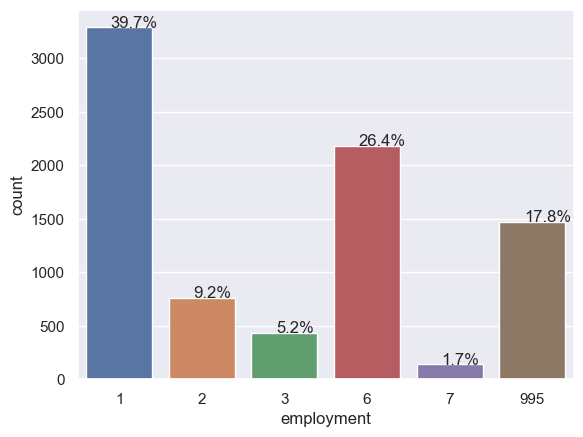

In [19]:
count_plot_percentage(data, 'employment')

* Most of the people are full-time paid employees
* Quarter of people aren't currently employed (e.g., retired, looking for work)
* Very few of people are volunteers or interns

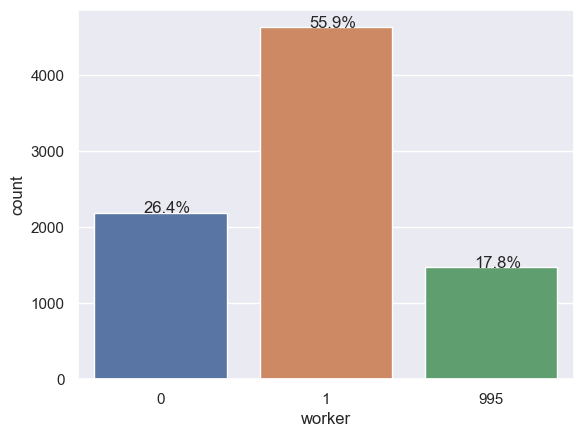

In [20]:
count_plot_percentage(data, 'worker')

* 55.9% of people are employed. Almost the half
* almost quarter of people aren't employed

In [21]:
data['jobs_count'].value_counts()

 995     5924
 1       2031
 2        231
 3         57
 6         17
-9998      15
 4          8
 5          3
Name: jobs_count, dtype: int64

In [22]:
data['job_type'].value_counts()

 995     5924
 1       1627
 2        497
 3        135
 4         88
-9998      15
Name: job_type, dtype: int64

Most usual work location for people is **one** work location, regardless of being a telework or onsite

In [23]:
data['industry'].value_counts().sort_values(ascending=False)

 995     5924
 8        337
 7        298
 18       247
 4        221
 1        211
 14       167
 16       129
 10       128
 15       124
 9        100
 12        91
 5         87
 17        60
 2         60
 13        43
 11        28
-9998      15
 6         13
 3          3
Name: industry, dtype: int64

* Most of them Missing: Skip logic
* Only 3 of them their work industry is: Capital goods (aerospace & defense, electrical, machinery)
* Most work industry in which people work in is: Health care/social assistance

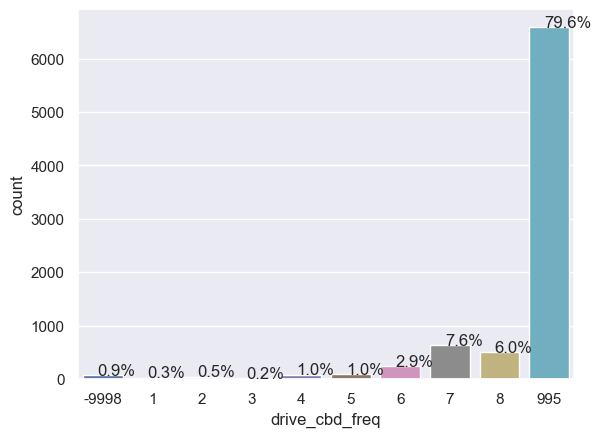

In [24]:
count_plot_percentage(data, 'drive_cbd_freq')

Regardless of 995(Missing: Skip logic), The majority of people who filled out the survey are those with least Frequency of driving vehicle into or within the area of Manhattan south of 60th Street

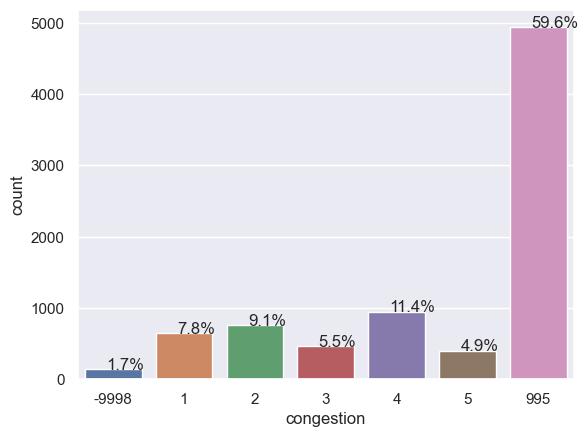

In [25]:
count_plot_percentage(data, 'congestion')

Proportion of people opposing and supporting the congistion almost equal

<AxesSubplot: xlabel='congestion', ylabel='count'>

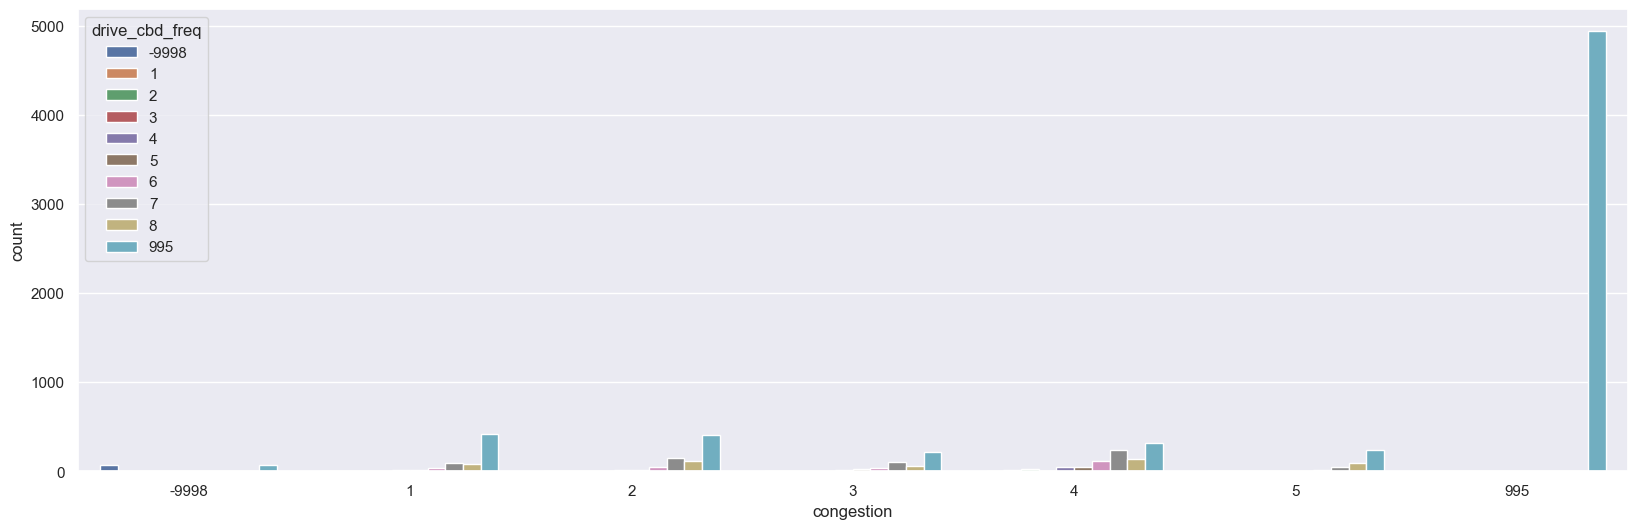

In [26]:
# Observe wheter people's frequency of driving vehicle into or within the area of Manhattan south of 60th Street affects supporting/opposing congesiton
plt.figure(figsize=(20, 6))
sns.countplot(x='congestion', hue='drive_cbd_freq', data=data)

No clear inferences, sounds that people who have never drived into or within Manhattan have alost equal voting with regard to congestion

In [27]:
data.groupby("congestion")["drive_cbd_freq"].value_counts()

congestion  drive_cbd_freq
-9998       -9998               73
             995                65
 1           995               413
             7                  87
             8                  86
             6                  30
             4                   8
             5                   8
             2                   7
             1                   3
             3                   3
 2           995               405
             7                 150
             8                 118
             6                  50
             5                  11
             4                  10
             2                   7
             1                   4
             3                   1
 3           995               218
             7                 107
             8                  61
             6                  37
             5                  19
             4                   9
             1                   3
             2              

Expect that people with more telework frequency support congestion and vice versa, let's detect that

<AxesSubplot: xlabel='telework_freq', ylabel='count'>

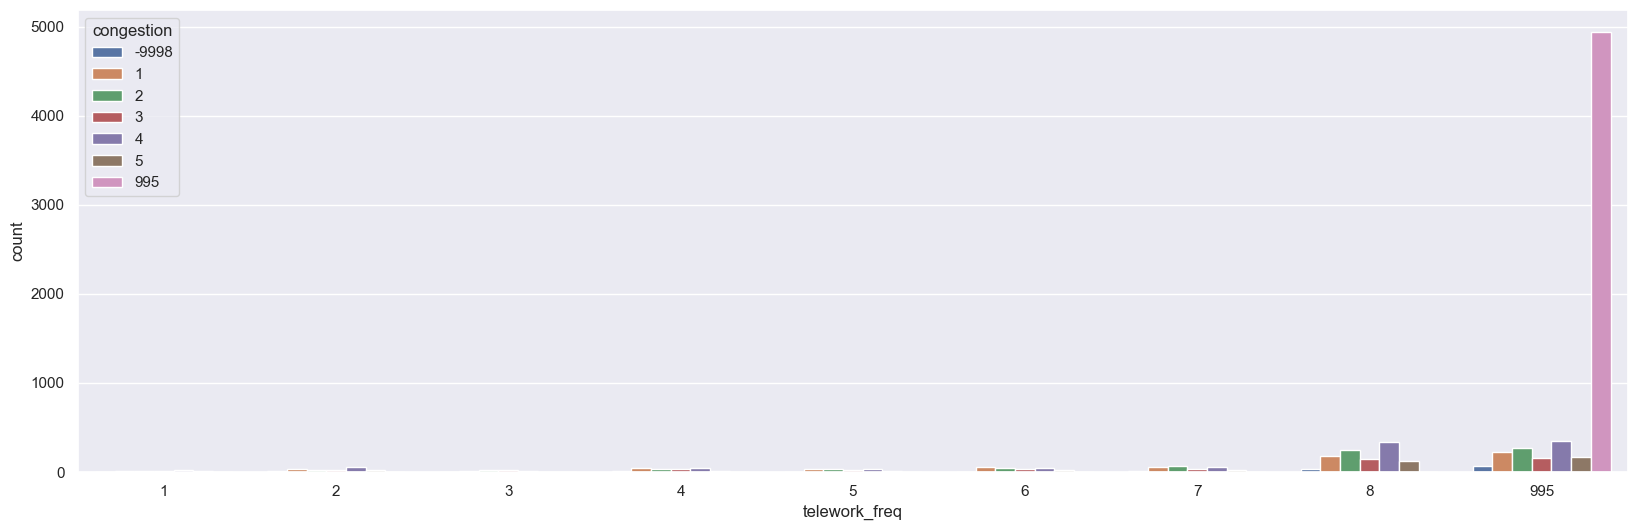

In [28]:
plt.figure(figsize=(20, 6))
sns.countplot(x='telework_freq', hue='congestion', data=data)

besides missing(skip logic), the majority voting is from people with no telework. Appear that most of them highly opposing congestion

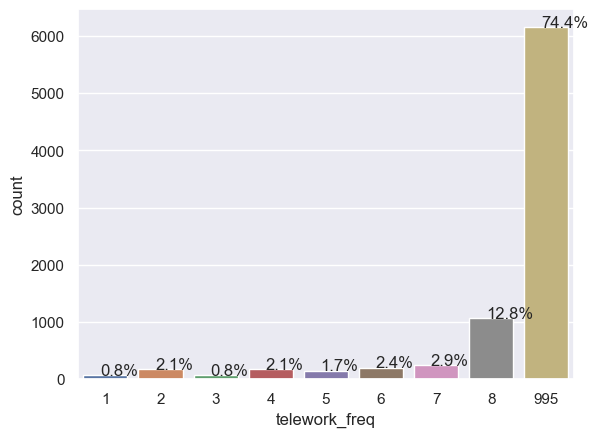

In [29]:
count_plot_percentage(data, 'telework_freq')

As detected from previous plot, majority of them are those with no telework, and missing(skip logic)

In [30]:
data['bike_num_days'].value_counts()

995    7007
0      1090
1        68
2        37
3        30
4        17
5        15
6        12
7        10
Name: bike_num_days, dtype: int64

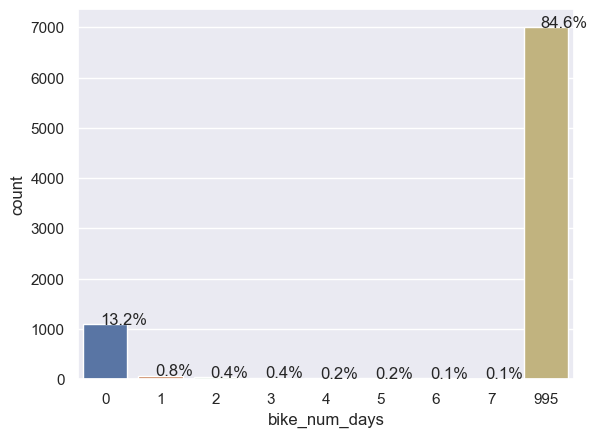

In [31]:
count_plot_percentage(data, 'bike_num_days')

Most of people don't ride a bike The whole week

<AxesSubplot: xlabel='bike_num_days', ylabel='count'>

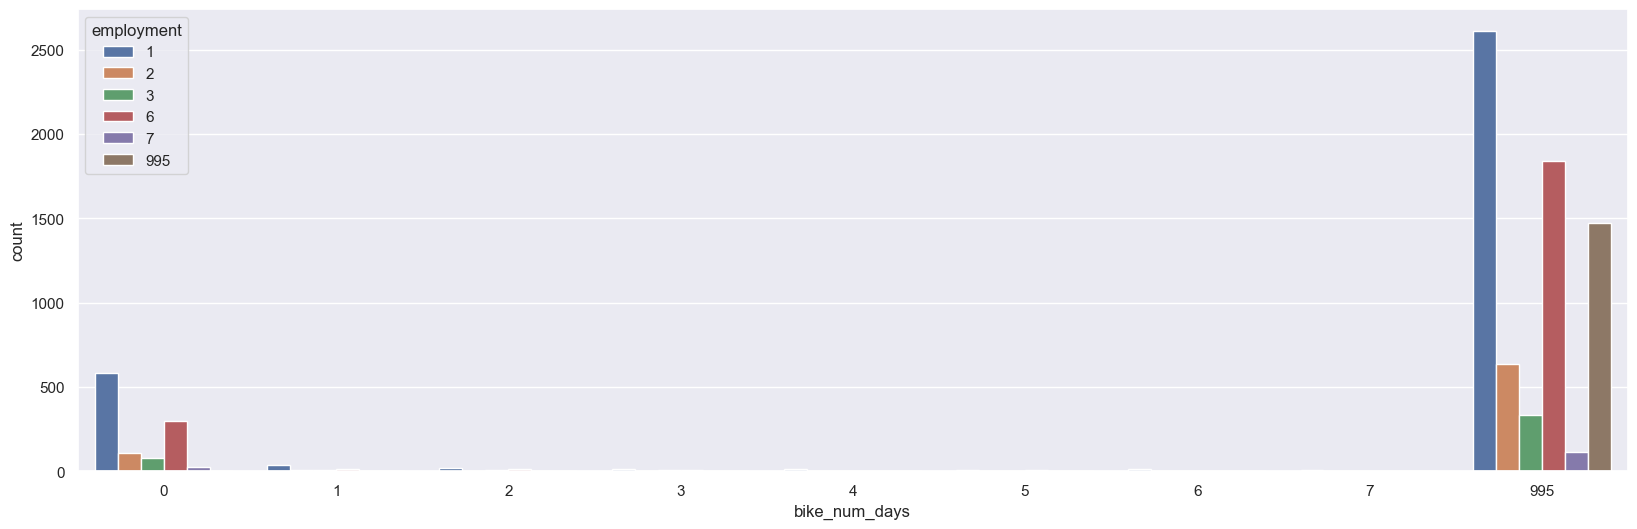

In [32]:
# Detect Bike && unemployed
plt.figure(figsize=(20, 6))
sns.countplot(x='bike_num_days', hue='employment', data=data)

In [33]:
trip_data = data[['hh_id','weight','cms_zone','survey_mode','person_id','person_num','is_participant','num_days','num_days_complete','num_trips','num_walk_trips','num_transit_trips','num_bike_trips','num_taxi_trips','num_tnc_trips','num_complete_weekend_days','num_complete_weekdays','first_travel_date','last_travel_date','made_trips','smartphone_type',
             'relationship','age','employment','worker']]

In [34]:
# Check unique values for each feature
obj = trip_data.nunique()
for key,value in obj.iteritems():
    print(key,",",value)

hh_id , 3346
weight , 2497
cms_zone , 10
survey_mode , 3
person_id , 8286
person_num , 11
is_participant , 2
num_days , 2
num_days_complete , 7
num_trips , 109
num_walk_trips , 68
num_transit_trips , 45
num_bike_trips , 25
num_taxi_trips , 11
num_tnc_trips , 14
num_complete_weekend_days , 3
num_complete_weekdays , 6
first_travel_date , 39
last_travel_date , 40
made_trips , 2
smartphone_type , 5
relationship , 10
age , 11
employment , 6
worker , 3


C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\168939690.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in obj.iteritems():


In [35]:
trip_data.dtypes

hh_id                          int64
weight                       float64
cms_zone                      object
survey_mode                    int64
person_id                      int64
person_num                     int64
is_participant                 int64
num_days                     float64
num_days_complete            float64
num_trips                    float64
num_walk_trips               float64
num_transit_trips            float64
num_bike_trips               float64
num_taxi_trips               float64
num_tnc_trips                float64
num_complete_weekend_days    float64
num_complete_weekdays        float64
first_travel_date             object
last_travel_date              object
made_trips                   float64
smartphone_type                int64
relationship                   int64
age                            int64
employment                     int64
worker                         int64
dtype: object

##### hh_id & person_id will be removed, it provides no extra information about the data
##### first_travel_date and last_travel_date will be removed in this iteration, not clearly understandable yet
##### num_days and num_days_complete won't be included in this iteration, need more information about them

In [36]:
data.drop(['hh_id','person_id','weight','first_travel_date','last_travel_date','num_days','num_days_complete'],axis=1, inplace=True)

##### only data when is_participant equals to 1 will be selected then drop the column, current information: not participant doesn't help in survey information, almost all data is null when is_participant equals to 0 

In [37]:
data_when_is_participant_zero = data[data['is_participant'] == 0]

In [38]:
# check sum of nulls 
obj = data_when_is_participant_zero.isnull().sum()
obj.sort_values(ascending=False)

num_complete_weekend_days     4940
num_taxi_trips                4940
work_park_amount_week         4940
work_park_amount_day          4940
made_trips                    4940
                              ... 
school_vehicle_pass_period       0
school_park_location             0
school_mode_own                  0
school_mode                      0
disability_none                  0
Length: 158, dtype: int64

In [39]:
# data = data[data['is_participant'] == 1]

In [40]:
obj = data.nunique()
for key,value in obj.iteritems():
    print(key,",",value)

cms_zone , 10
survey_mode , 3
person_num , 11
is_participant , 2
num_trips , 109
num_walk_trips , 68
num_transit_trips , 45
num_bike_trips , 25
num_taxi_trips , 11
num_tnc_trips , 14
num_complete_weekend_days , 3
num_complete_weekdays , 6
made_trips , 2
smartphone_type , 5
relationship , 10
age , 11
employment , 6
worker , 3
student , 3
license , 4
vehicle , 10
congestion , 7
drive_cbd_freq , 10
planning_apps , 10
job_type , 6
jobs_count , 8
industry , 20
telework_freq , 9
work_cms_zone , 12
missing_work_location , 2
work_mode , 10
work_mode_own , 5
work_park_location , 6
work_park_pay , 7
work_vehicle_pass_period , 6
work_park_amount_day , 11
work_park_amount_week , 10
work_park_amount_month , 16
work_park_amount_year , 4
work_mode_auto , 6
work_mode_bus , 8
work_mode_rail , 6
work_mode_ferry , 3
work_mode_taxi , 6
work_mode_bike , 5
work_bike_park , 8
work_mode_scooter , 1
work_scooter_park , 1
school_type , 14
school_cms_zone , 10
missing_school_location , 2
kid_accompany , 3
school

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\3930099614.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in obj.iteritems():


##### as a result person_num and relationship feature will be deleted because they have on value

In [41]:
data.drop(['person_num','relationship'],axis=1,inplace=True)

In [42]:
trips_numerical_data = data[['num_trips','num_walk_trips','num_transit_trips','num_bike_trips','num_taxi_trips','num_tnc_trips','num_complete_weekend_days',
                      'num_complete_weekdays']]

In [43]:
trips_numerical_data.describe()

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000
mean,25.540646,10.004782,5.827555,0.419307,0.111775,0.374776,1.266886,3.067244
std,21.900434,12.091553,7.646751,2.141812,1.664201,1.181070,0.843984,1.858192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,24.000000,5.000000,2.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,41.000000,16.000000,10.000000,0.000000,0.000000,0.000000,2.000000,5.000000
max,178.000000,93.000000,57.000000,36.000000,92.000000,18.000000,2.000000,5.000000


##### from the frequency matrix -columns features, rows values- 
##### for example count of 1 of survey_mode is the most frequent which means people filled the survey by using rMove (smartphone app)
##### Northern Bronx is the most frequent cms_zone
##### Age values are between 5 and 11, which means 18yo and older
##### most answers from people has iphone mobile 

In [44]:
# display correlation matrix between features
numeric_corr_matrix = trips_numerical_data.corr()
numeric_corr_matrix

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays
num_trips,1.000000,0.685732,0.574478,0.162543,0.081621,0.187826,0.494895,0.530072
num_walk_trips,0.685732,1.000000,0.610044,0.116651,0.021248,0.183317,0.428865,0.468685
num_transit_trips,0.574478,0.610044,1.000000,0.009034,0.015657,0.135196,0.346632,0.380096
num_bike_trips,0.162543,0.116651,0.009034,1.000000,0.007480,0.062776,0.090722,0.105136
num_taxi_trips,0.081621,0.021248,0.015657,0.007480,1.000000,0.033284,0.036010,0.036915
num_tnc_trips,0.187826,0.183317,0.135196,0.062776,0.033284,1.000000,0.155752,0.166960
num_complete_weekend_days,0.494895,0.428865,0.346632,0.090722,0.036010,0.155752,1.000000,0.703968
num_complete_weekdays,0.530072,0.468685,0.380096,0.105136,0.036915,0.166960,0.703968,1.000000


##### NaN = no correlation between, they don't affect/change each other, propably going to be deleted --person_num--
##### regardless the change of person_num, num of trips kinds don't change

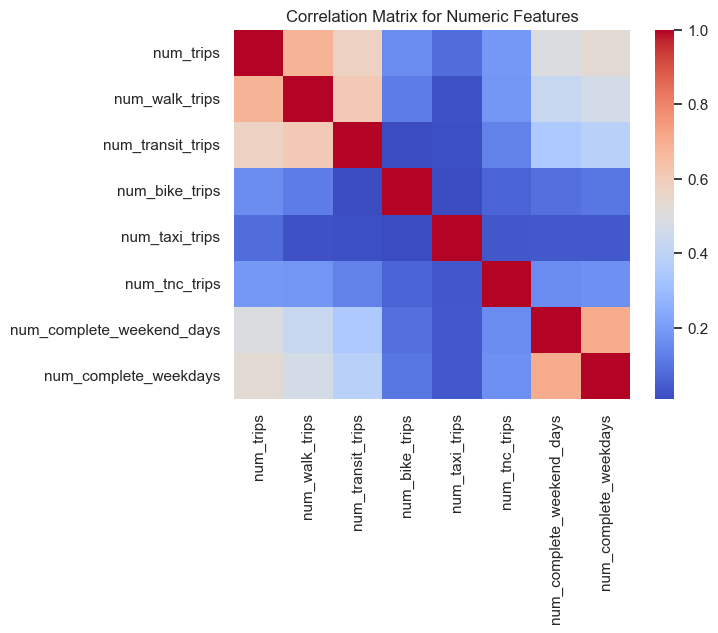

In [45]:
# Plot a correlation matrix for numeric features
sns.heatmap(numeric_corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [46]:
categorical_data = data[['made_trips','smartphone_type','age','cms_zone','survey_mode']]

In [47]:
categorical_data['age'].unique()

array([ 9,  8,  5,  7,  6,  4,  3,  1,  2, 10, 11], dtype=int64)

In [48]:
# dropping age 1 (under 5) // data may be innaccurate
# data.drop(data[data['age'] == 1].index, inplace=True)

##### See Frequency/Count for each value of the categorical features

In [49]:
categorical_frequency = categorical_data.apply(pd.Series.value_counts)
categorical_frequency

,made_trips,smartphone_type,age,cms_zone,survey_mode
0.0,309.0,377.0,NaN,NaN,NaN
1.0,3037.0,1206.0,405.0,NaN,6495.0
2.0,NaN,1747.0,871.0,NaN,1538.0
3.0,NaN,16.0,197.0,NaN,253.0
4.0,NaN,NaN,795.0,NaN,NaN
5.0,NaN,NaN,1502.0,NaN,NaN
6.0,NaN,NaN,1225.0,NaN,NaN
7.0,NaN,NaN,1186.0,NaN,NaN
8.0,NaN,NaN,1067.0,NaN,NaN
9.0,NaN,NaN,696.0,NaN,NaN


<AxesSubplot: >

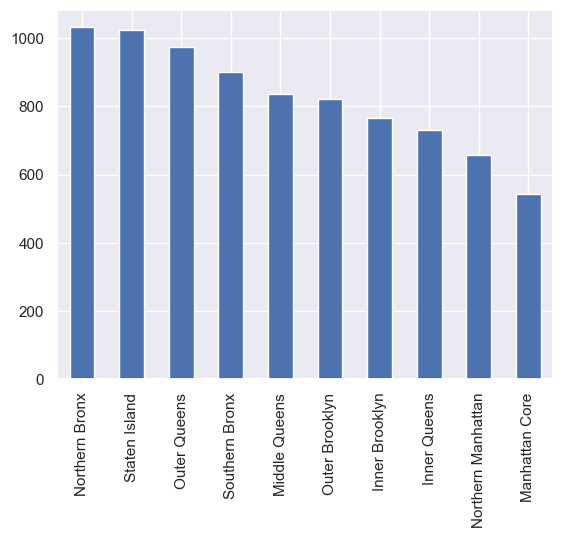

In [50]:
categorical_data['cms_zone'].value_counts().plot(kind='bar')

In [51]:
school_numerical_data = data[['school_park_amount_day','school_park_amount_week','school_park_amount_month','school_park_amount_year']]

In [52]:
school_categorical_data = data[['student','license','vehicle','congestion','school_type','school_cms_zone',
                                       'missing_school_location','kid_accompany','school_mode','school_mode_own','school_park_location',
                                       'school_vehicle_pass_period', 'school_mode_auto', 'school_mode_bus','school_mode_rail', 'school_mode_ferry', 'school_access',
                                       'school_egress', 'school_mode_taxi', 'school_mode_bike','school_bike_park', 'school_mode_scooter', 'school_scooter_park']]

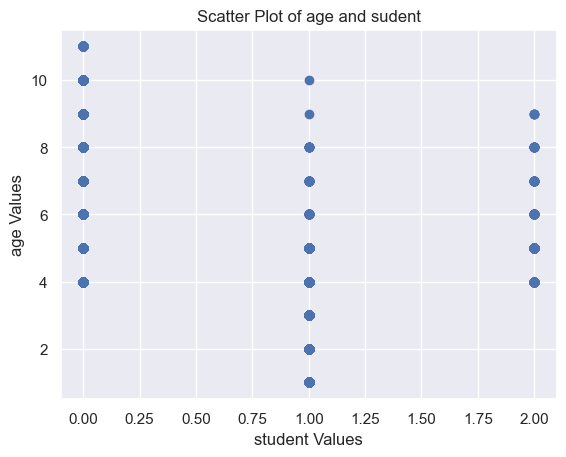

In [53]:
# Plot a scatter plot of two features
plt.scatter(data['student'], data['age'])
plt.title('Scatter Plot of age and sudent')
plt.xlabel('student Values')
plt.ylabel('age Values')
plt.show()

In [54]:
data[data['student'] == 1]['age'].unique()

array([ 5,  3,  1,  2,  4,  6,  7,  8,  9, 10], dtype=int64)

In [55]:
data.loc[data['student'] == 1]['age'].unique()

array([ 5,  3,  1,  2,  4,  6,  7,  8,  9, 10], dtype=int64)

#### from the plot
##### not students age varies between 4(18-24) and 11(85 or older)
##### full time student age varies between 1(Under 5) //dropped and 10(75-84)
##### half-time student age varies between 4(18-24) and 9(65-74)

<AxesSubplot: >

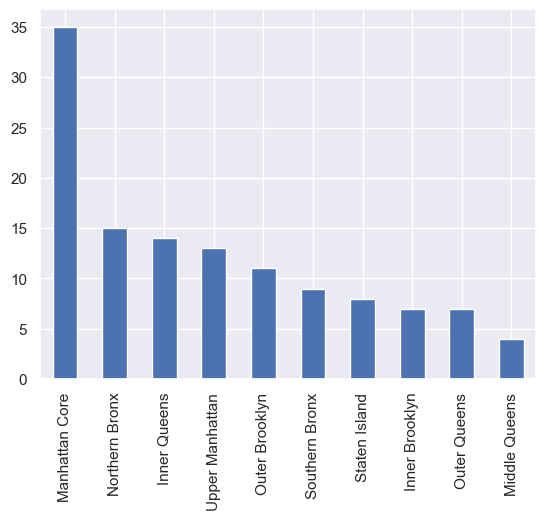

In [56]:
school_categorical_data['school_cms_zone'].value_counts().plot(kind='bar')

##### Manhattan Core has the highest number of school

<AxesSubplot: >

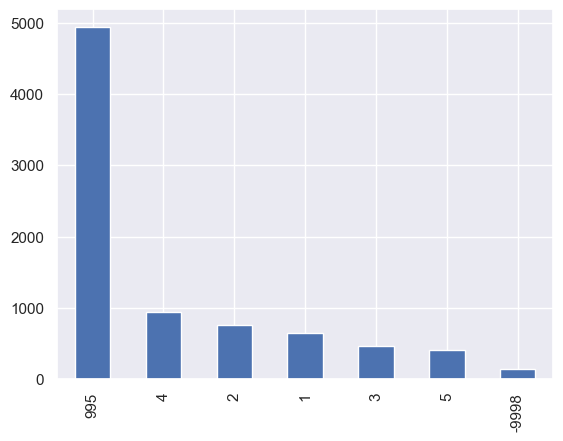

In [57]:
school_categorical_data['congestion'].value_counts().plot(kind='bar')

##### high number of people don't agree with the policy of congestion pricing (4)

In [58]:
school_numerical_data.describe()

,school_park_amount_day,school_park_amount_week,school_park_amount_month,school_park_amount_year
count,7.000000,5.000000,8.000000,8.000000
mean,7.892857,21.050000,23.781250,128.156250
std,6.177677,28.202615,21.036294,161.335882
min,0.250000,0.250000,0.250000,0.250000
25%,3.000000,4.000000,12.250000,12.250000
50%,8.000000,15.000000,18.000000,53.000000
75%,12.500000,16.000000,31.250000,212.500000
max,16.000000,70.000000,60.000000,450.000000


In [59]:
# display correlation matrix between features
numeric_corr_matrix = school_numerical_data.corr()
numeric_corr_matrix

,school_park_amount_day,school_park_amount_week,school_park_amount_month,school_park_amount_year
school_park_amount_day,1.0,1.0,1.0,1.0
school_park_amount_week,1.0,1.0,1.0,1.0
school_park_amount_month,1.0,1.0,1.0,1.0
school_park_amount_year,1.0,1.0,1.0,1.0


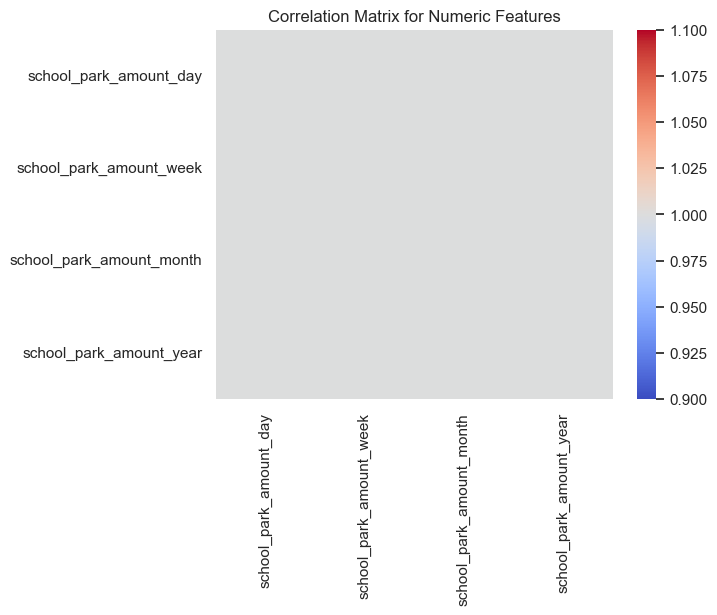

In [60]:
# Plot a correlation matrix for numeric features
sns.heatmap(numeric_corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

##### Strong Correlated

In [61]:
harassment_data = data[['harassment','harassment_private_car', 'harassment_alone', 'harassment_attention',
       'harassment_defense', 'harassment_other', 'harassment_none', 'gender',
       'education', 'english_proficiency', 'ethnicity', 'race_american_indian',
       'race_asian', 'race_black', 'race_native_hawaiian', 'race_white',
       'race_other', 'disability_hearing', 'disability_seeing',
       'disability_walking', 'disability_mobility', 'disability_dressing',
       'disability_concentrating', 'disability_none']]

<AxesSubplot: >

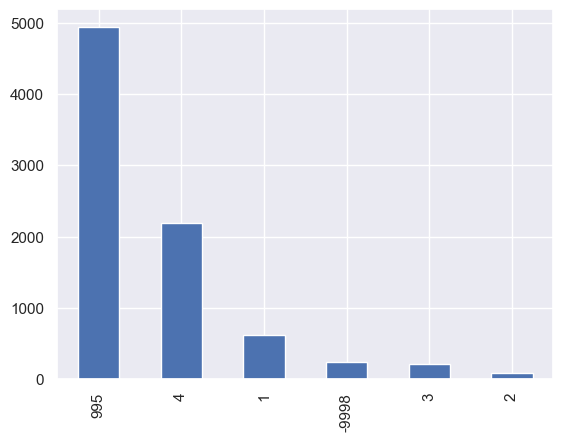

In [62]:
harassment_data['harassment'].value_counts().plot(kind='bar')

##### most haven't seen or experienced harassment (4)

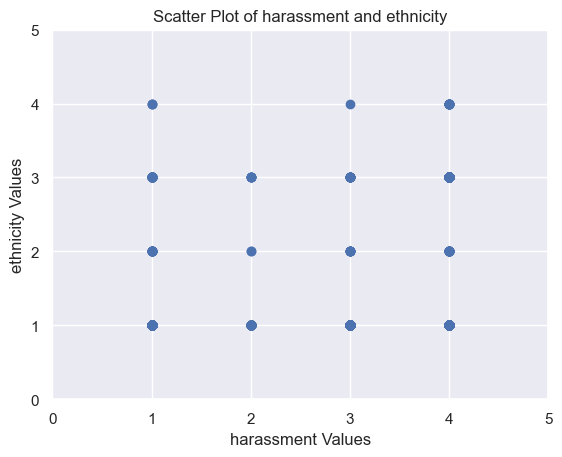

In [63]:
# Plot a scatter plot of two features
plt.scatter(harassment_data['harassment'], harassment_data['ethnicity'])
plt.title('Scatter Plot of harassment and ethnicity')
plt.xlabel('harassment Values')
plt.ylabel('ethnicity Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### all have seen and/or experienced harassment, and mexican people seem to experience it the most

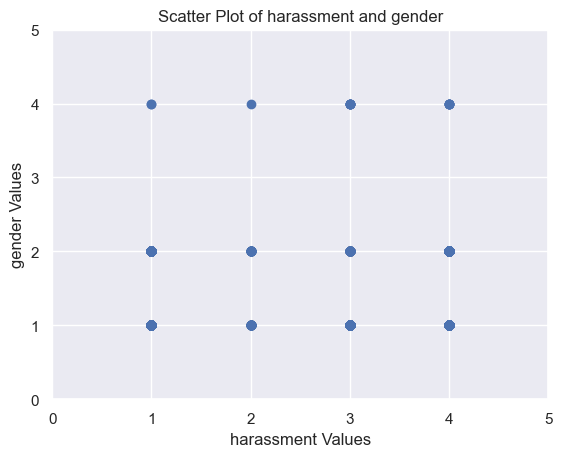

In [64]:
plt.scatter(harassment_data['harassment'], harassment_data['gender'])
plt.title('Scatter Plot of harassment and gender')
plt.xlabel('harassment Values')
plt.ylabel('gender Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### all genders are equal

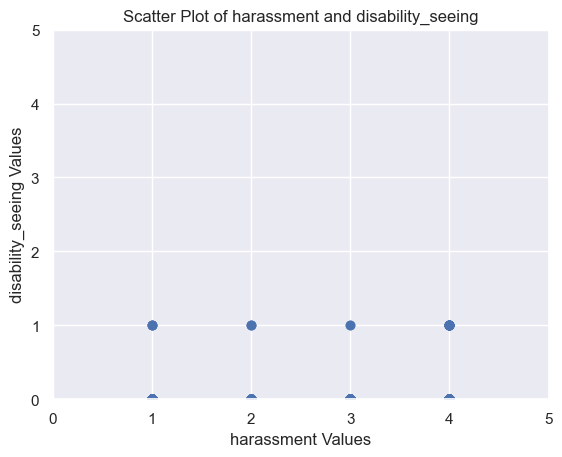

In [65]:
plt.scatter(harassment_data['harassment'], harassment_data['disability_seeing'])
plt.title('Scatter Plot of harassment and disability_seeing')
plt.xlabel('harassment Values')
plt.ylabel('disability_seeing Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### disabilities doesn't really affect

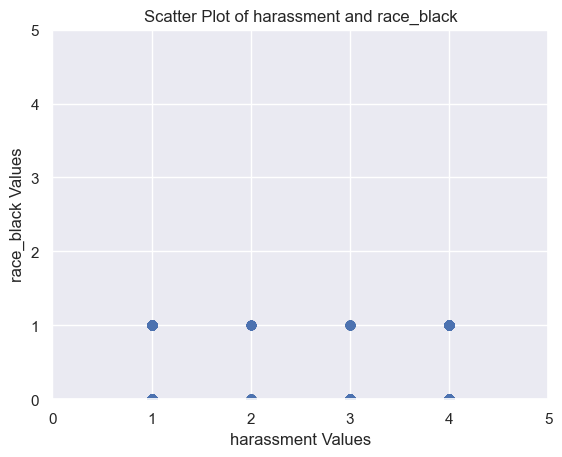

In [66]:
plt.scatter(harassment_data['harassment'], harassment_data['race_black'])
plt.title('Scatter Plot of harassment and race_black')
plt.xlabel('harassment Values')
plt.ylabel('race_black Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### black or other doesn't affect

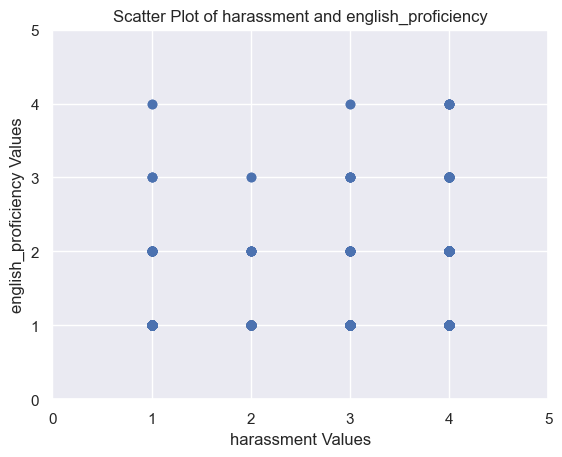

In [67]:
plt.scatter(harassment_data['harassment'], harassment_data['english_proficiency'])
plt.title('Scatter Plot of harassment and english_proficiency')
plt.xlabel('harassment Values')
plt.ylabel('english_proficiency Values')
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

##### who speaks english well got harassment

In [68]:
package_data = data[['packages','packages_distance']]

In [69]:
package_frequency = package_data.apply(pd.Series.value_counts)
package_frequency

,packages,packages_distance
-9998,234,NaN
1,696,44.0
2,1283,98.0
3,312,161.0
4,163,93.0
5,152,29.0
6,150,40.0
7,163,NaN
8,193,NaN
995,4940,7821.0


<AxesSubplot: >

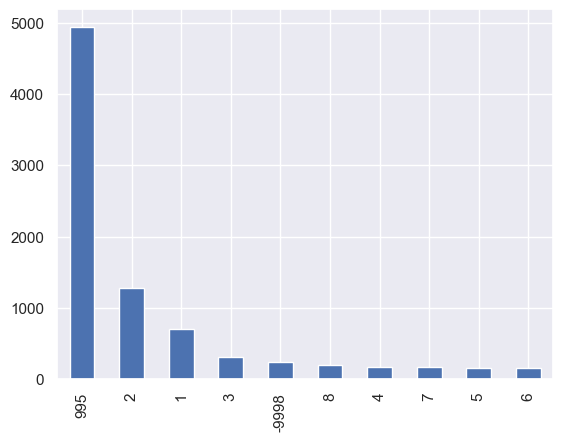

In [70]:
package_data['packages'].value_counts().plot(kind='bar')

#### most people recieve their packages at their doorsteps

<AxesSubplot: >

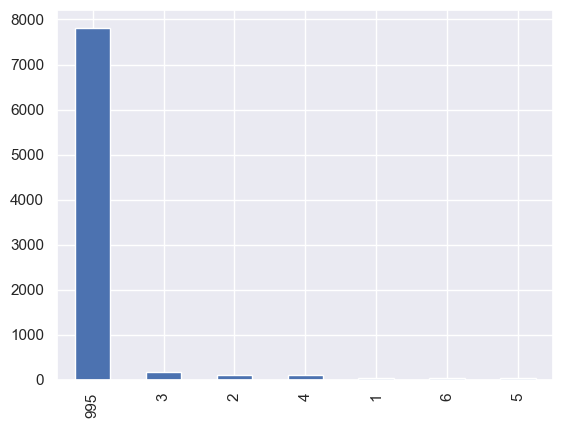

In [71]:
package_data['packages_distance'].value_counts().plot(kind='bar')

#### most people move 3 blocks away ((around neighbourhood)) to get their packages 
###### 1 block = 15 meters

In [72]:
numerical_data= pd.concat([trips_numerical_data,school_numerical_data],axis=1)

In [73]:
numerical_data['school_park_amount_year'].unique()

array([    nan, 9.0e+01, 4.5e+02, 2.5e+02, 2.0e+02, 2.5e-01, 4.0e+00,
       1.6e+01, 1.5e+01])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


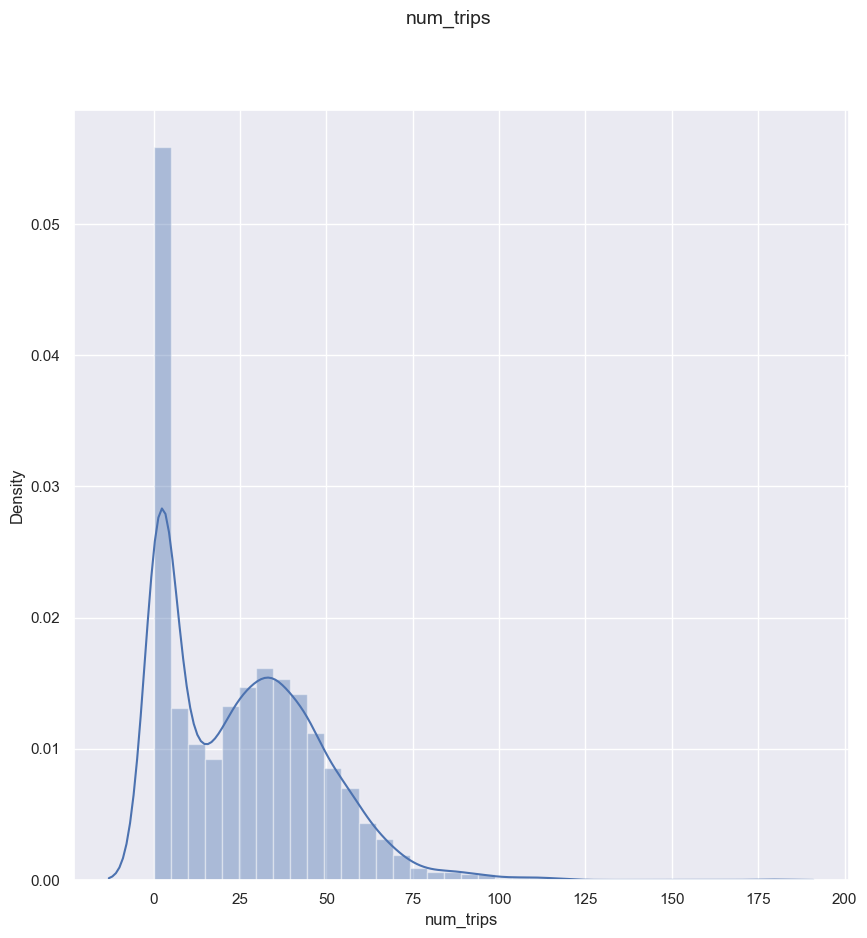

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


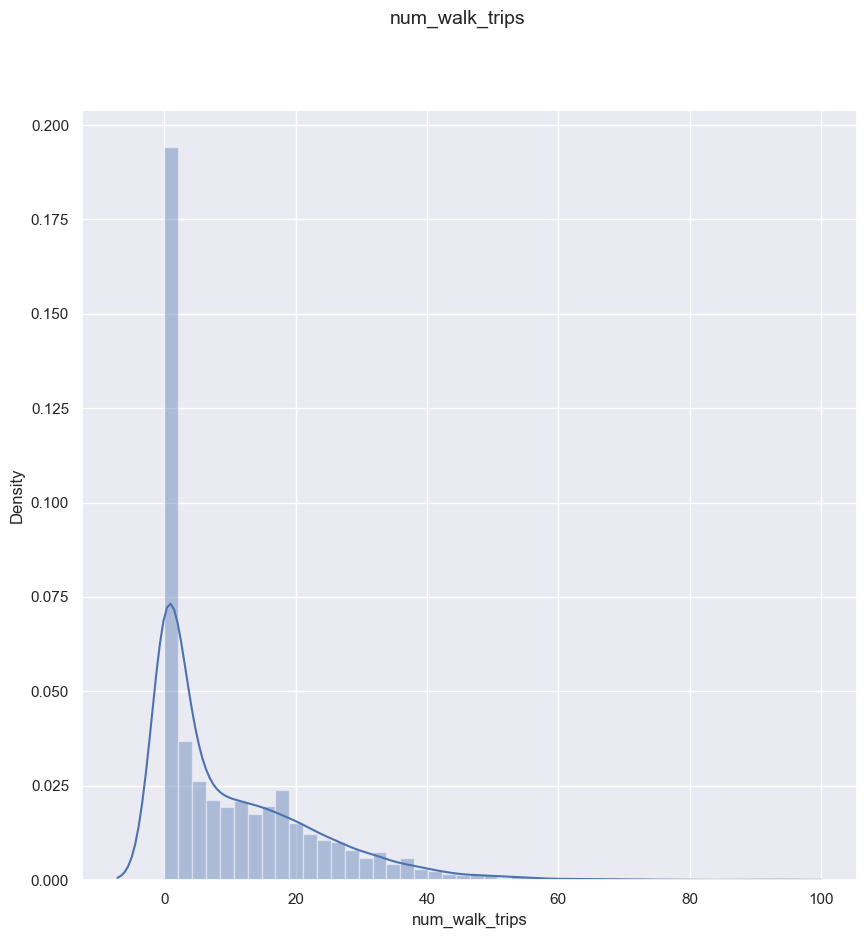

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


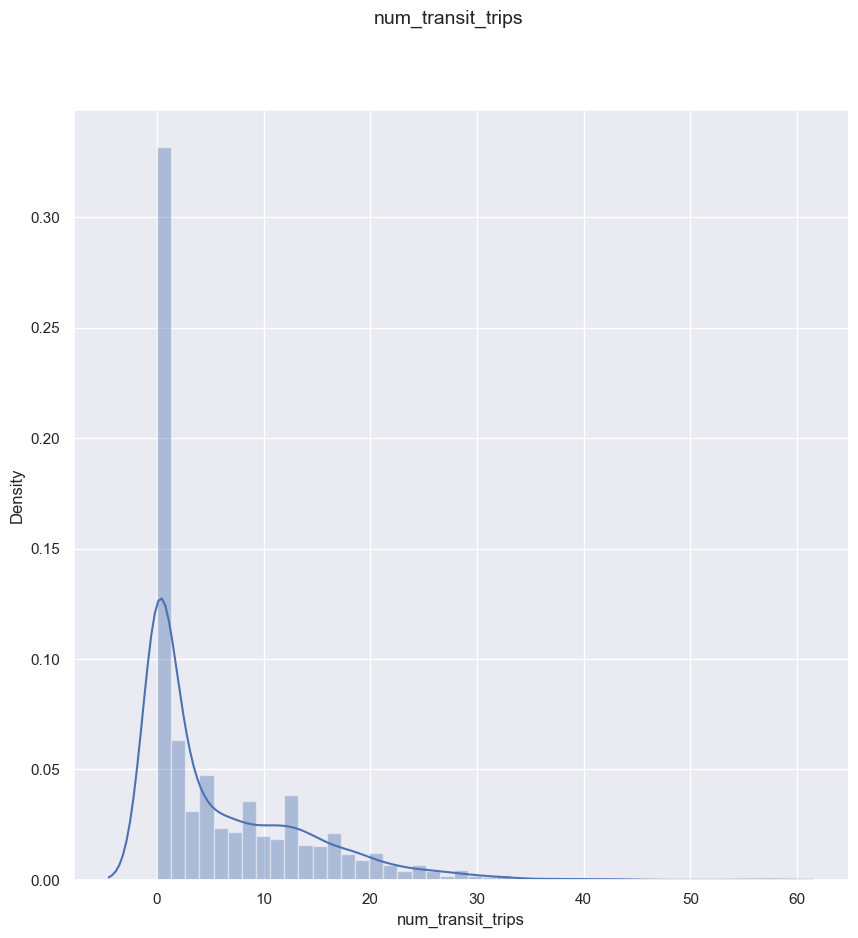

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


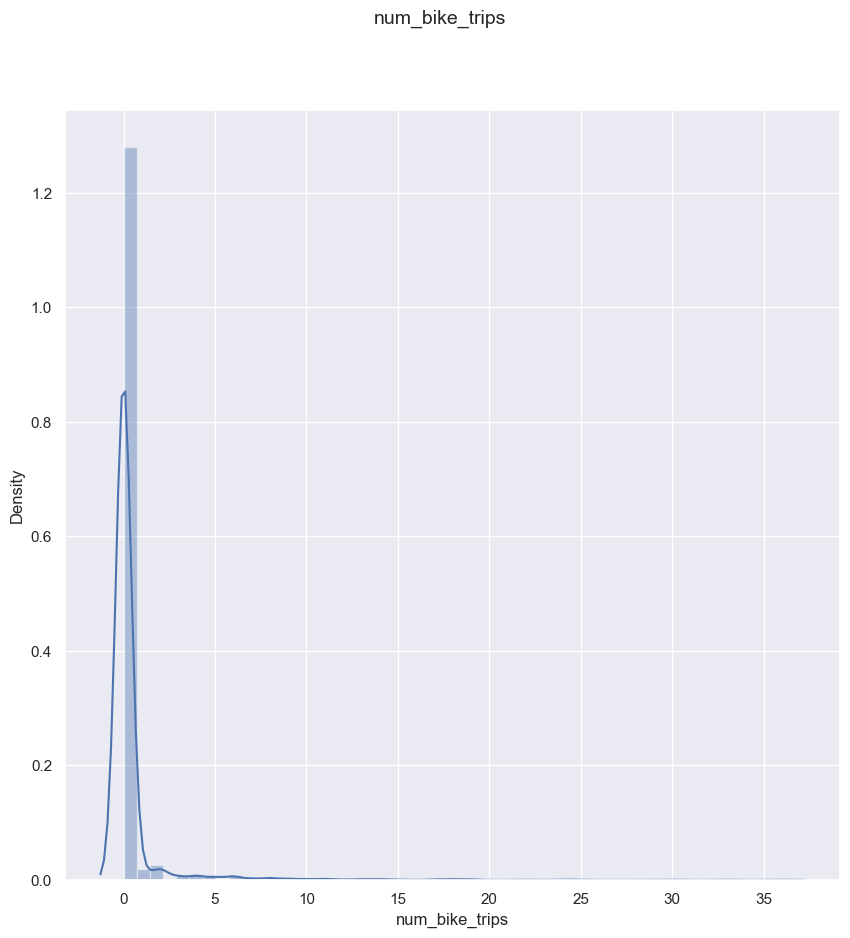

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


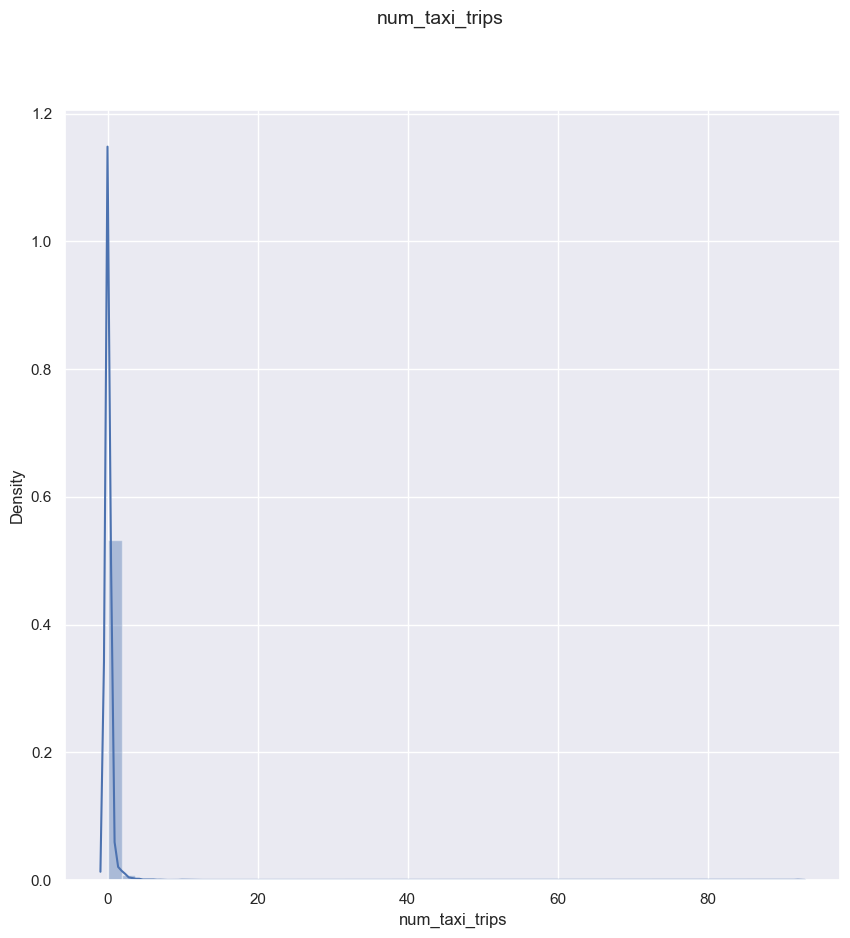

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


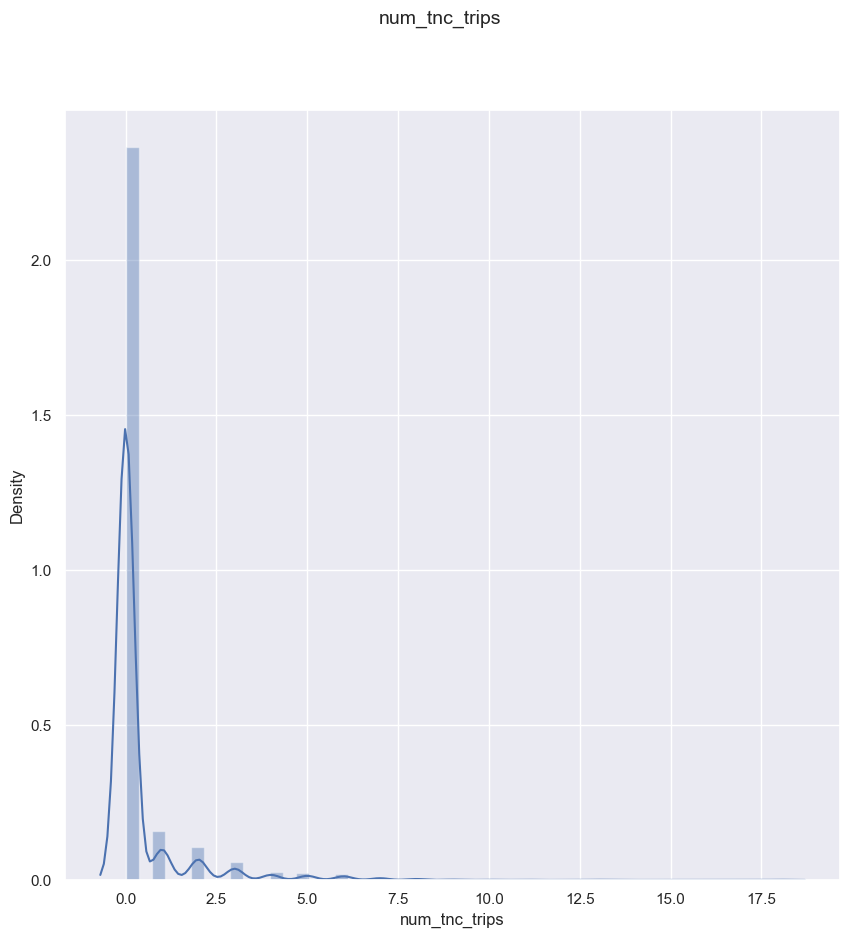

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


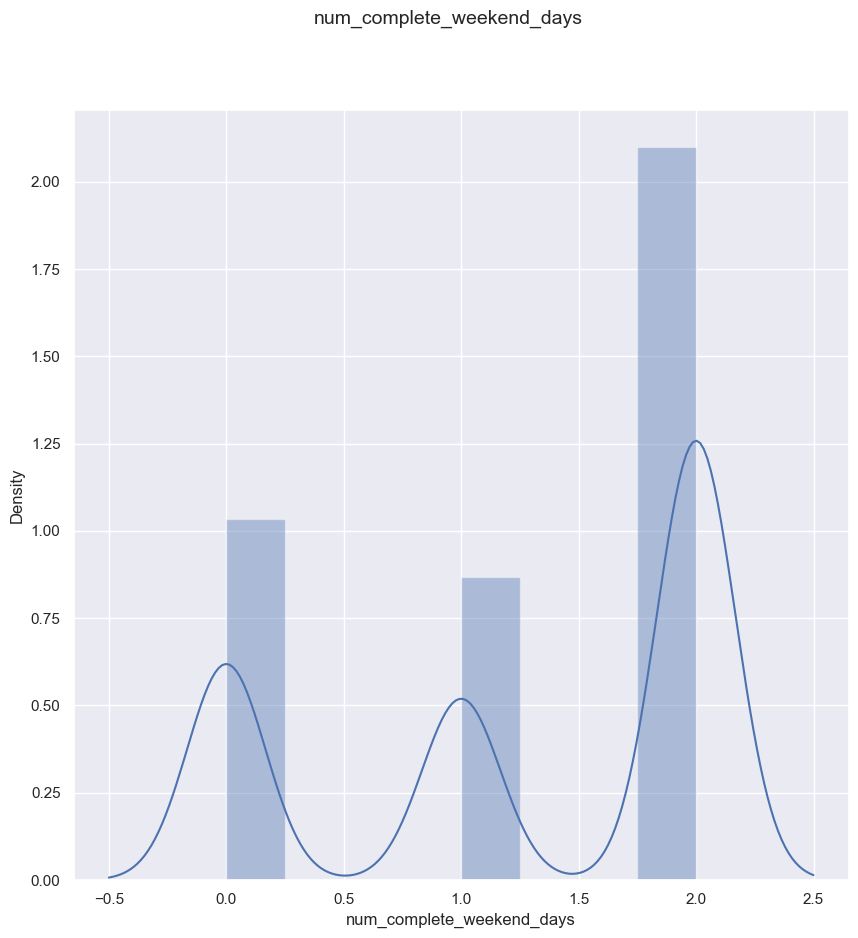

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


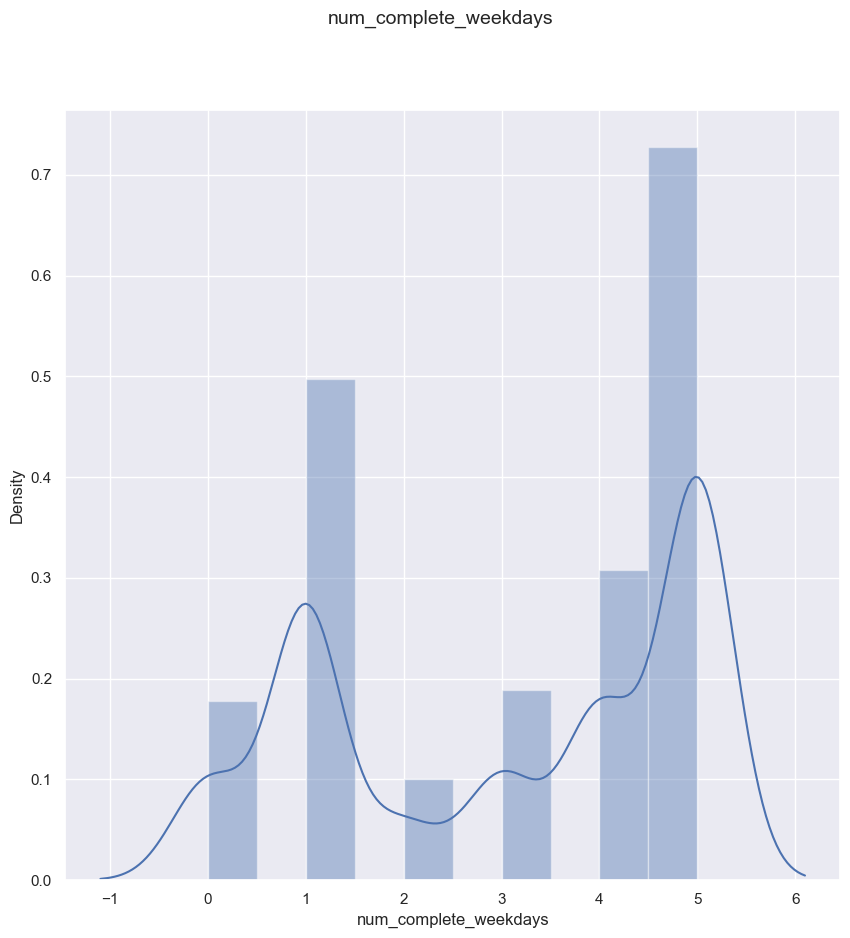

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


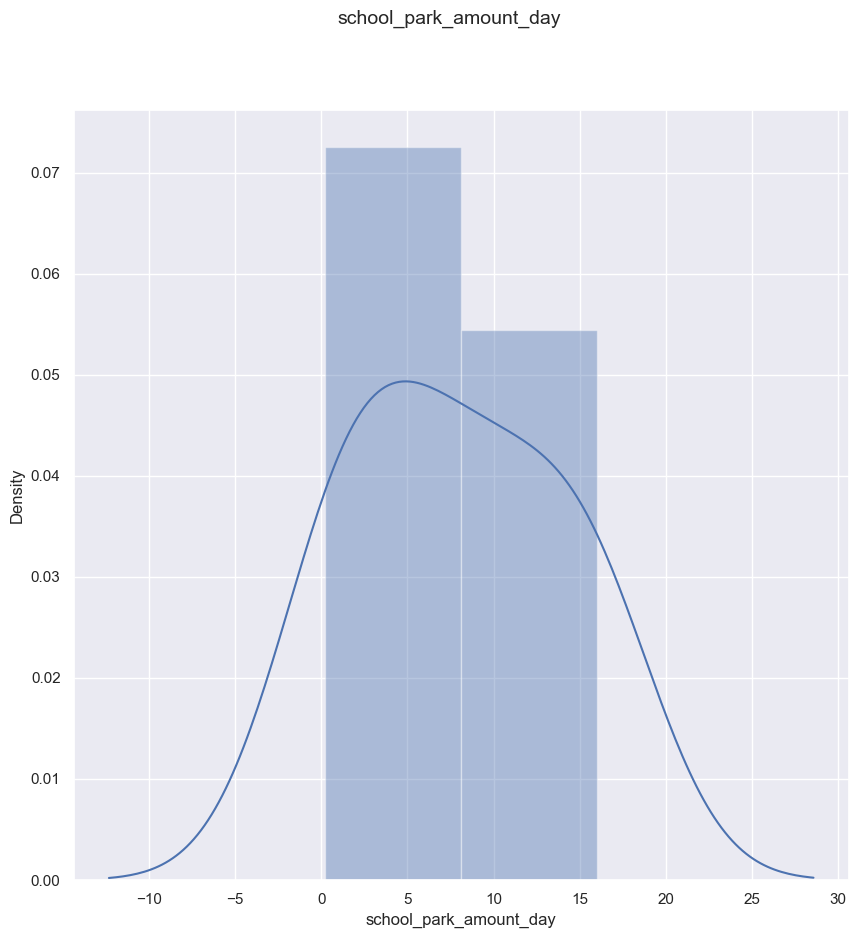

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


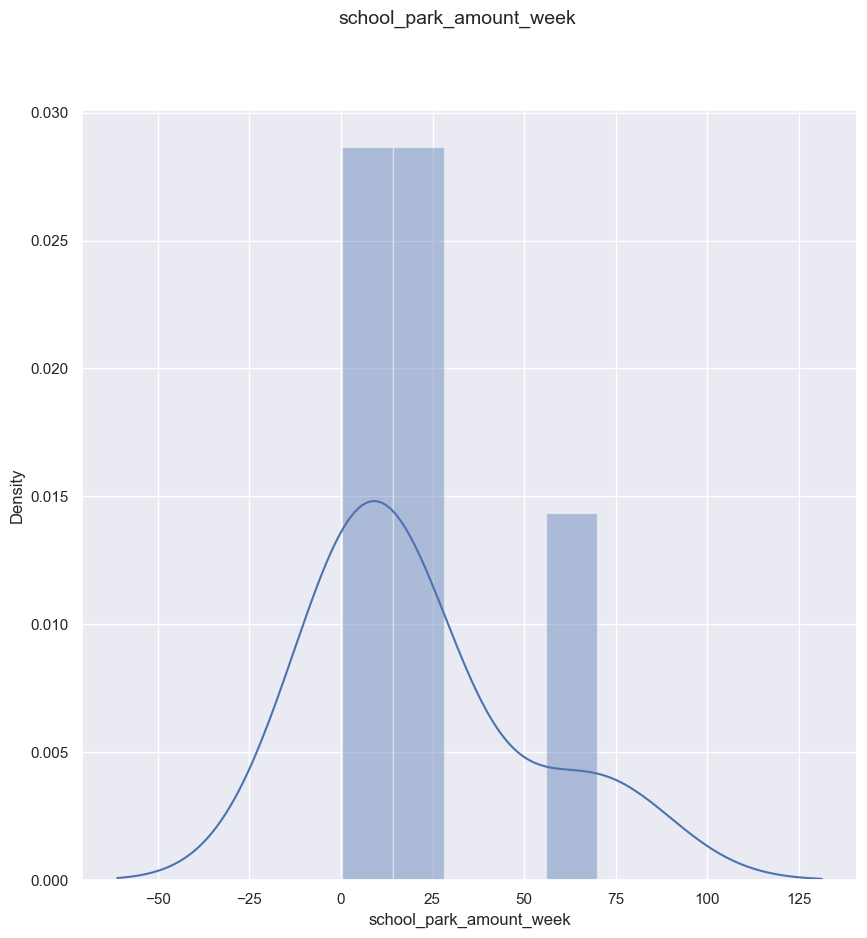

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


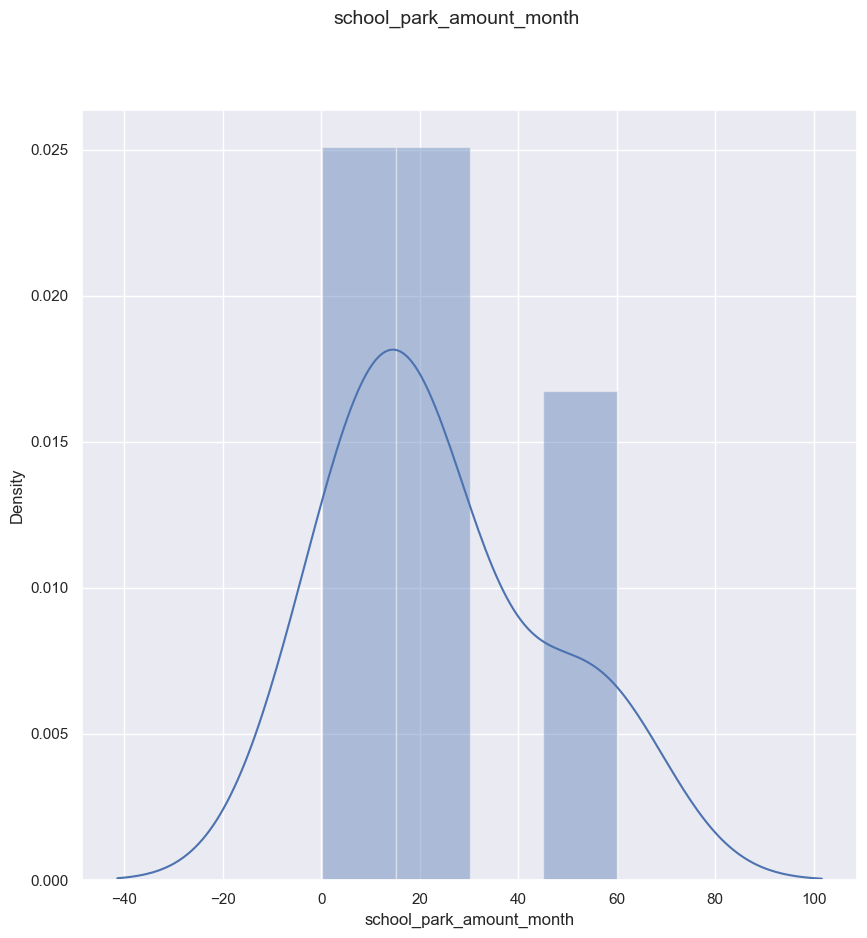

C:\Users\DELL\AppData\Local\Temp\ipykernel_2332\2273597600.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax=ax)


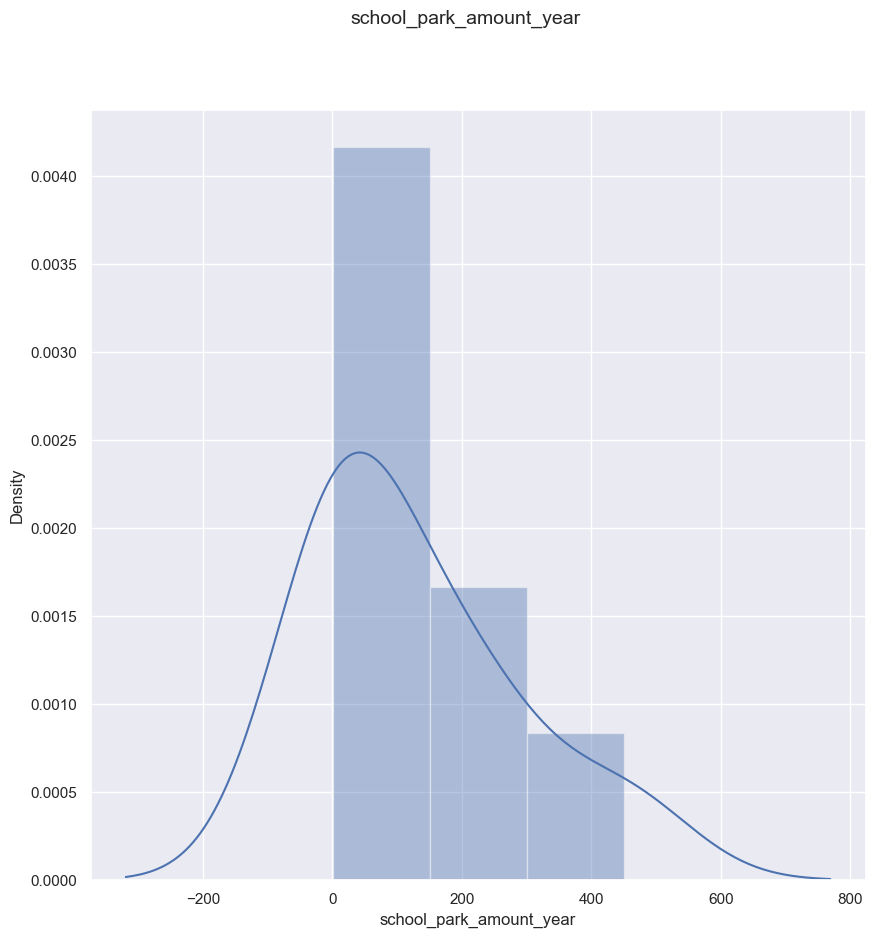

In [74]:
def plots_(data,feature): 
        fig, ax = plt.subplots(1, figsize=(10,10), sharey=True)
        fig.suptitle(feature, fontsize=14)
        sns.distplot(data[feature], ax=ax)
        plt.show()

for column in numerical_data:
    feature=plots_(numerical_data, column)

# Missing Values

convert the -9998 value to NaN to handle it also with missing values

In [75]:
for column in data.columns:
    data[column] = data[column].replace(-9998,np.nan)
    data[column] = data[column].replace("-9998",np.nan)

compute the percentage of null values of each column

In [76]:
null_percentage = data.isna().sum().apply(lambda x:x/data.shape[0]*100).sort_values(ascending=False)[data.isna().sum()>0] 

<AxesSubplot: >

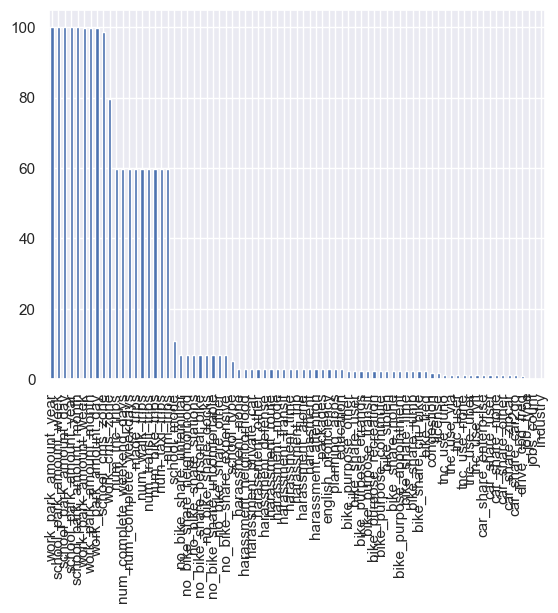

In [77]:
null_percentage.plot(kind='bar')

remove any column have more than 50% NULL

In [78]:
print(f"before Remove  {data.shape}")
data.drop(columns=null_percentage[null_percentage>50].index.to_list(),inplace=True)
print(f"after Remove  {data.shape}")


before Remove  (8286, 156)
after Remove  (8286, 137)


for the rest we will remove any row have null value

In [79]:
print(f"before Remove  {data.shape}")
data = data.dropna(axis=0)
print(f"after Remove  {data.shape}")

before Remove  (8286, 137)
after Remove  (6728, 137)


remove any row have is_participant value not 1 becouse all the rest of the values are null

In [80]:
print(f"before Remove  {data.shape}")
data = data[data["is_participant"]==1]
print(f"after Remove  {data.shape}")

before Remove  (6728, 137)
after Remove  (2692, 137)


# Encoding Features

In [81]:
with open("data/columns_encoding.json") as file:
    columns_dictionary = json.loads(file.read()) # read the file as string and convert it to dictionary

In [82]:
columns_dictionary

{'survey_mode': {'1': 'rMove',
  '2': 'rSurvey',
  '3': 'Call center',
  '995': 'skip logic'},
 'is_participant': {'0': 'Not selected', '1': 'Selected', '995': 'skip logic'},
 'made_trips': {'0': 'Not selected', '1': 'Selected', '995': 'skip logic'},
 'relationship': {'0': 'Self',
  '1': 'Spouse or partner',
  '2': 'Son or daughter',
  '3': 'Father or mother',
  '4': 'Brother or sister',
  '5': 'Other relative',
  '6': 'Roommate or friend',
  '7': 'Household help',
  '995': 'skip logic'},
 'age': {'1': 'Under 5',
  '2': '5-15',
  '3': '16-17',
  '4': '18-24',
  '5': '25-34',
  '6': '35-44',
  '7': '45-54',
  '8': '55-64',
  '9': '65-74',
  '10': '75-84',
  '11': '85 or older',
  '995': 'skip logic'},
 'employment': {'1': 'Employed full-time',
  '2': 'Employed part-time',
  '3': 'Primarily self-employed',
  '6': 'Not currently employed',
  '7': 'Unpaid volunteer or intern',
  '995': 'skip logic'},
 'worker': {'0': 'Not employed', '1': 'Employed', '995': 'skip logic'},
 'student': {'0': 

for each column_name in the dictionary encode the data using the dictionary values to create one_hot_encoding

In [83]:
#TODO: LabelEncoder for ordinal data, s.t. Age

In [84]:
#TODO: OHE 'cms_zone' feature

In [85]:
for column_name in columns_dictionary:
    data = one_hot_encoding(data=data,column=column_name,dictionary=columns_dictionary[column_name])

In [86]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('uint8')],
      dtype=object)

In [87]:
data.select_dtypes(include='object').columns # will handle it later

Index(['cms_zone'], dtype='object')

select numberic features only to apply kmeans on them

In [88]:
numeric_fetures = data.select_dtypes(include=np.number).columns.tolist()
data_numeric = data[numeric_fetures]
data_numeric.shape

(2692, 285)

apply Standard Scaler on the Data

In [89]:
data_numeric_standarized = StandardScaler().fit_transform(data_numeric)
data_numeric_standarized = pd.DataFrame(data_numeric_standarized, columns = data_numeric.columns)
data_numeric_standarized.head()
# data_numeric_standarized = data_numeric

,smartphone_type,jobs_count,bike_num_days,survey_mode_Call center,survey_mode_rMove,survey_mode_rSurvey,is_participant_Selected,age_18-24,age_25-34,age_35-44,...,disability_walking_Not selected,disability_walking_Selected,disability_mobility_Not selected,disability_mobility_Selected,disability_dressing_Not selected,disability_dressing_Selected,disability_concentrating_Not selected,disability_concentrating_Selected,disability_none_Not selected,disability_none_Selected
0,-0.507334,1.449614,-1.182246,-0.252213,0.679305,-0.586502,0.0,-0.274007,1.998608,-0.491045,...,0.402302,-0.284824,0.297584,-0.131851,0.284824,-0.104355,0.314999,-0.163393,-0.36141,0.468191
1,0.873600,-0.690243,-1.186326,-0.252213,0.679305,-0.586502,0.0,-0.274007,1.998608,-0.491045,...,0.402302,-0.284824,0.297584,-0.131851,0.284824,-0.104355,0.314999,-0.163393,-0.36141,0.468191
2,0.873600,-0.690243,-1.186326,-0.252213,0.679305,-0.586502,0.0,-0.274007,-0.500348,-0.491045,...,0.402302,-0.284824,0.297584,-0.131851,0.284824,-0.104355,0.314999,-0.163393,-0.36141,0.468191
3,0.873600,-0.690243,-1.176126,-0.252213,0.679305,-0.586502,0.0,-0.274007,1.998608,-0.491045,...,0.402302,-0.284824,0.297584,-0.131851,0.284824,-0.104355,0.314999,-0.163393,-0.36141,0.468191
4,-0.507334,-0.688090,0.843432,-0.252213,0.679305,-0.586502,0.0,-0.274007,1.998608,-0.491045,...,0.402302,-0.284824,0.297584,-0.131851,0.284824,-0.104355,0.314999,-0.163393,-0.36141,0.468191


# Hyper Parameter Tuning

finding the optimal k using elbow

In [90]:
result = []
potential_k = list(range(2, 21))
for k in potential_k:
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(data_numeric_standarized)
  result.append(kmeans.inertia_)

In [91]:
result[1:5]

[693670.890481632, 674511.6354128337, 664723.0775498876, 652757.5140396573]

In [92]:
optimal_k_elbow = result[1:5].index(min(result[1:5]))+1

finding the optimal k using silhouette_score

In [93]:
sil = []
kmax = 20
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, n_init=10).fit(data_numeric_standarized)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_numeric_standarized, labels, metric = 'euclidean'))

In [94]:
result = [value/10000 for value in result]

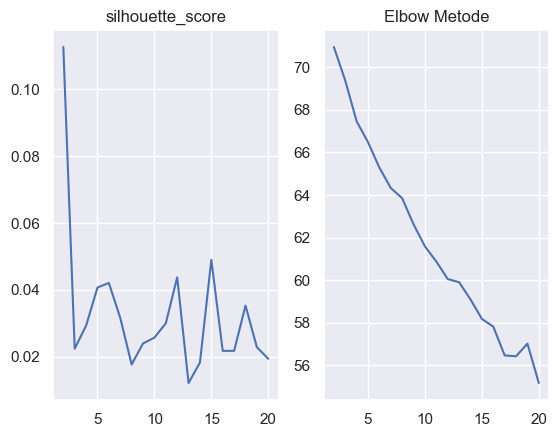

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(2,kmax+1),sil)
ax2.plot(potential_k, result)
ax1.set_title('silhouette_score')
ax2.set_title('Elbow Metode')
plt.show()

In [96]:
optimal_k = sil.index(max(sil))+2

In [97]:
print(f"optimal K using elbow : {optimal_k_elbow}")
print(f"optimal K using silh : {optimal_k}")

optimal K using elbow : 4
optimal K using silh : 2


# Modeling

train the model with the optimal_k value 

In [98]:
kmeans = KMeans(n_clusters=optimal_k_elbow)
y_kmeans = kmeans.fit_predict(data_numeric_standarized)
centers = kmeans.cluster_centers_

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Evaluating

use PCA to reduce the dimentions of the data to plot it in 2d space

In [99]:
pca_model = PCA(n_components = 2)
pca_model.fit(data_numeric_standarized)

PCA(n_components=2)

In [100]:
training_data_pca = pca_model.transform(data_numeric_standarized)
centers_pca = pca_model.transform(centers)

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


draw the data in 2d space

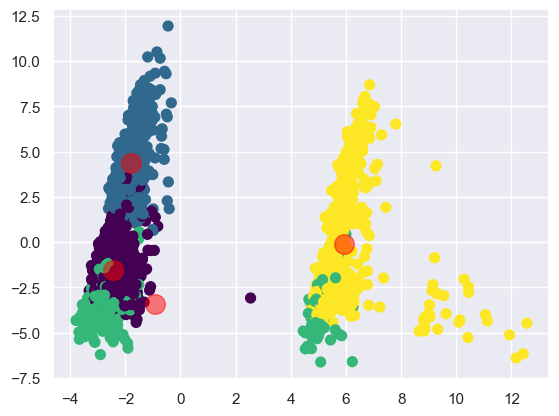

In [101]:
plt.scatter(training_data_pca[:, 0],
            training_data_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.5)

In [102]:
import umap.umap_ as umap

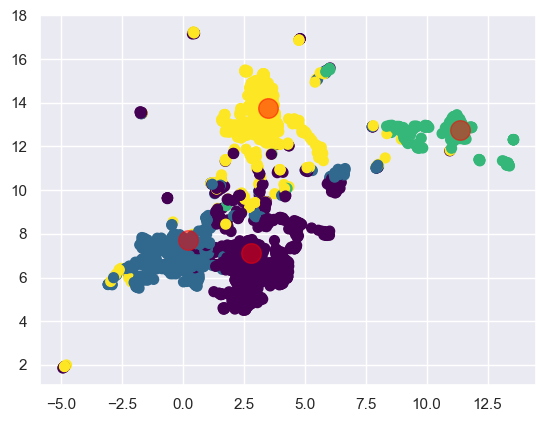

In [103]:
reducer = umap.UMAP(n_components=2)
umap_model = reducer.fit(data_numeric_standarized)
training_data_embedding = umap_model.transform(data_numeric_standarized)
centers_embedding = umap_model.transform(centers)

# plot the data in the low dim with the cluster results
plt.scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers_embedding[:, 0], centers_embedding[:, 1], c='red', s=200, alpha=0.5)

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


[[ 0.21145277 -0.68991079  0.13976446 ... -0.11430195 -0.23615412
   0.25711892]
 [-0.3885443   1.35759346  0.24479718 ...  0.1647839   0.34979651
  -0.40783283]
 [ 0.1491098  -0.68969385 -0.14485917 ... -0.12696595 -0.2707335
   0.27194225]
 [-0.02236336  0.09020787 -0.37575202 ...  0.07972342  0.15998118
  -0.13632542]]
[[-2.44193763 -1.55456674 -1.75200547]
 [-1.78280291  4.37015004  0.05000918]
 [-0.91502224 -3.42418503  6.48840172]
 [ 5.91790402 -0.1067671  -0.70982287]]


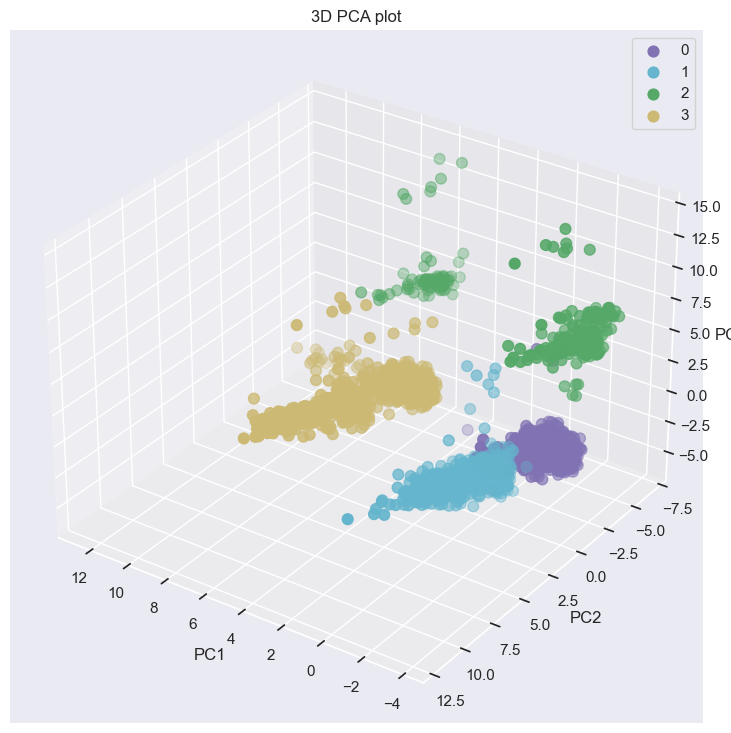

In [104]:
pca = PCA(n_components=3)
pca.fit(data_numeric_standarized)
pca_bcancer = pca.transform(data_numeric_standarized)
pca_centers = pca.transform(centers)
print(centers)
print(pca_centers)
cdict = {0:'m',1:'c',2:'g',3:'y'}
label = {0:'0',1:'1',2:"2",3:"3"}
y = y_kmeans

Xax = pca_bcancer[:,0]
Yax = pca_bcancer[:,1]
Zax = pca_bcancer[:,2]

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, 
                     projection='3d')
 
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], 
            Yax[ix], 
            Zax[ix], 
            c=cdict[l], 
            s=60,
           label=label[l])
 


ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.11267740185438732
For n_clusters = 3 The average silhouette_score is : 0.018584200698178757
For n_clusters = 4 The average silhouette_score is : 0.032485758938386476
For n_clusters = 5 The average silhouette_score is : 0.031392012900094565
For n_clusters = 6 The average silhouette_score is : 0.01633112936743233
For n_clusters = 7 The average silhouette_score is : 0.037905194956377036
For n_clusters = 8 The average silhouette_score is : 0.044078888321879665
For n_clusters = 9 The average silhouette_score is : 0.003425120349210449


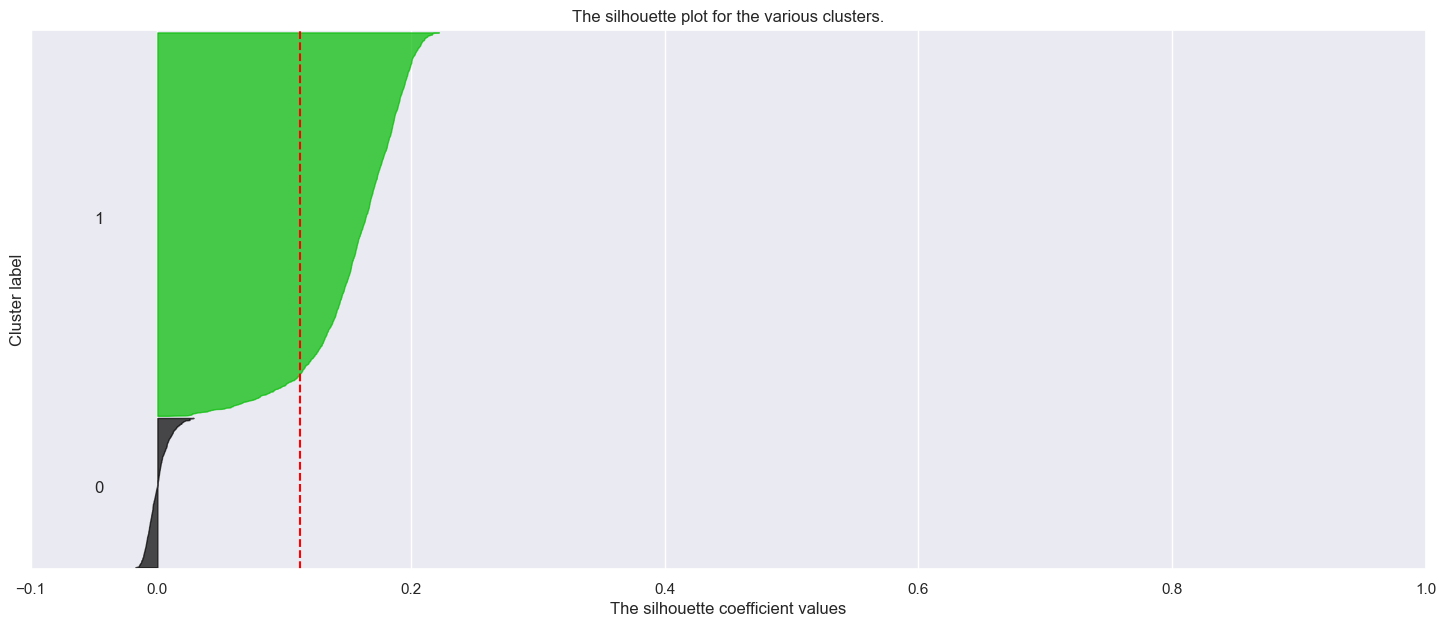

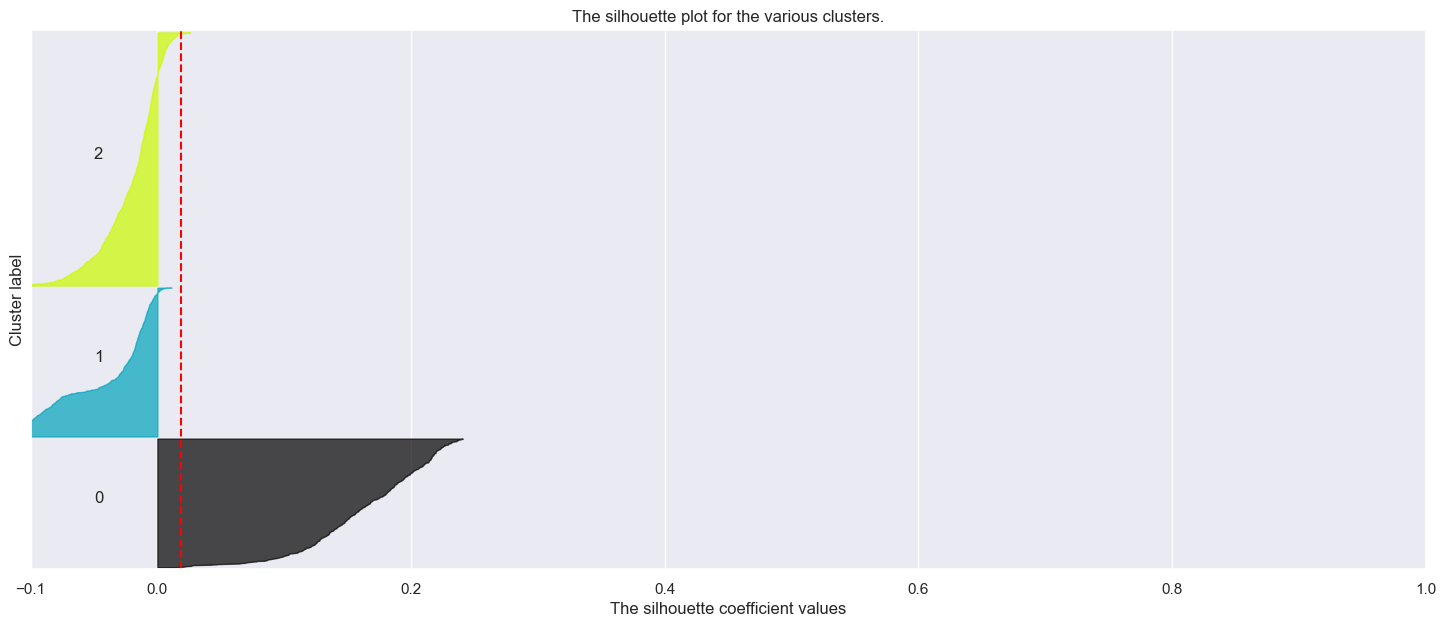

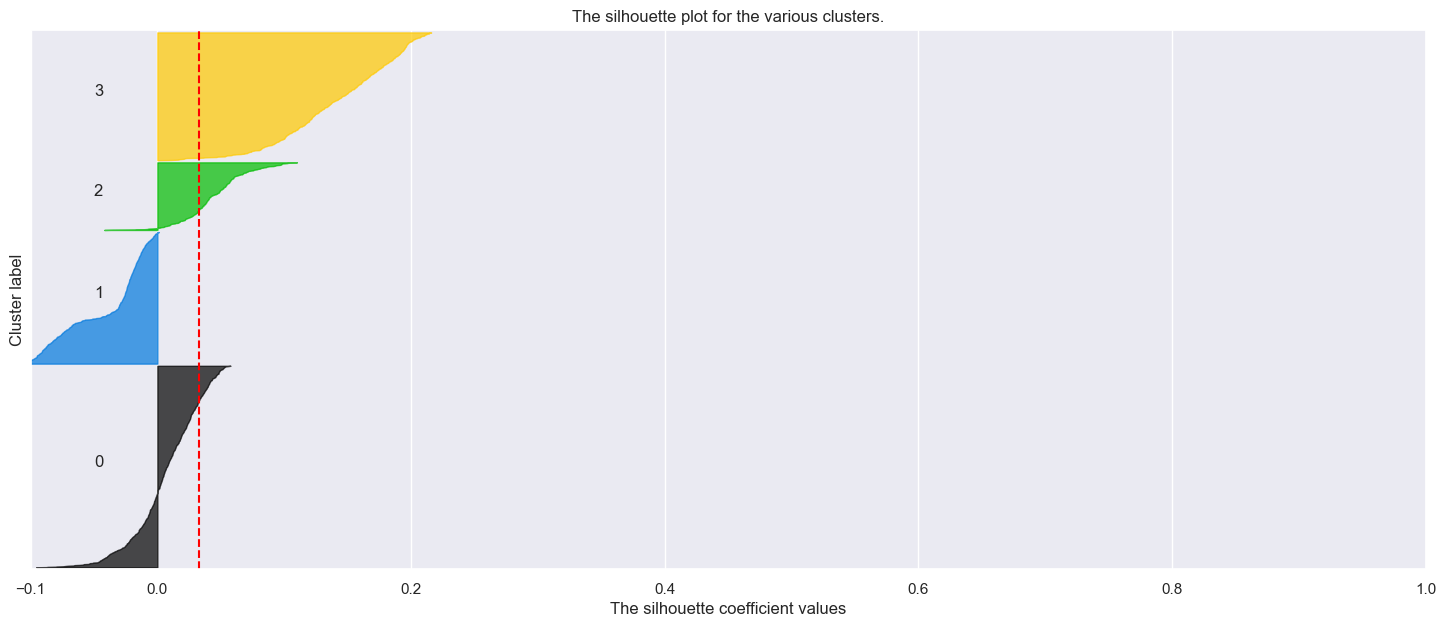

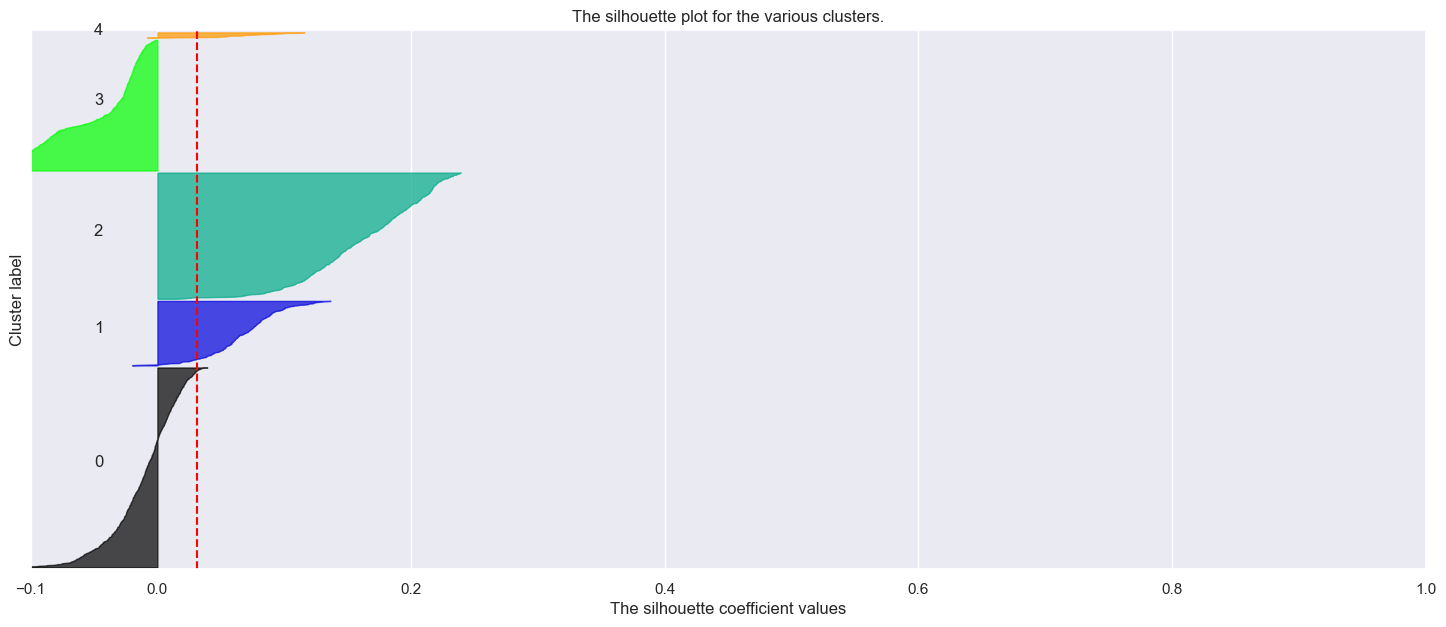

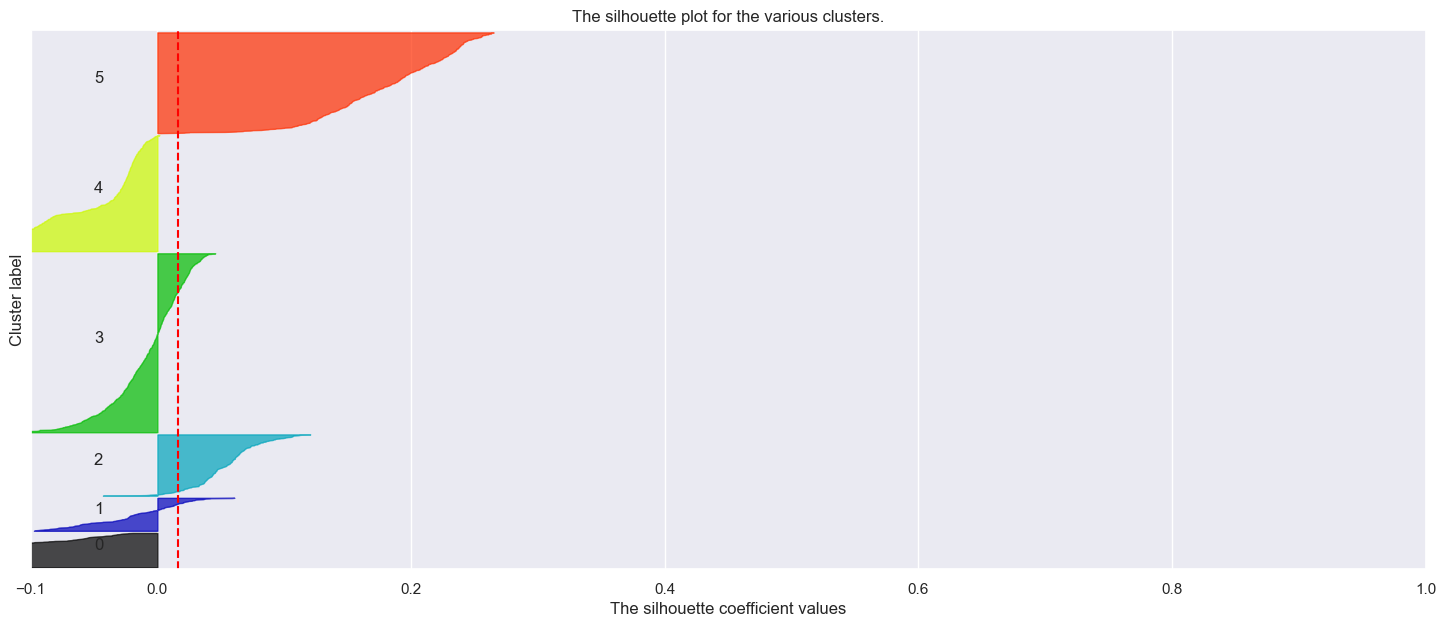

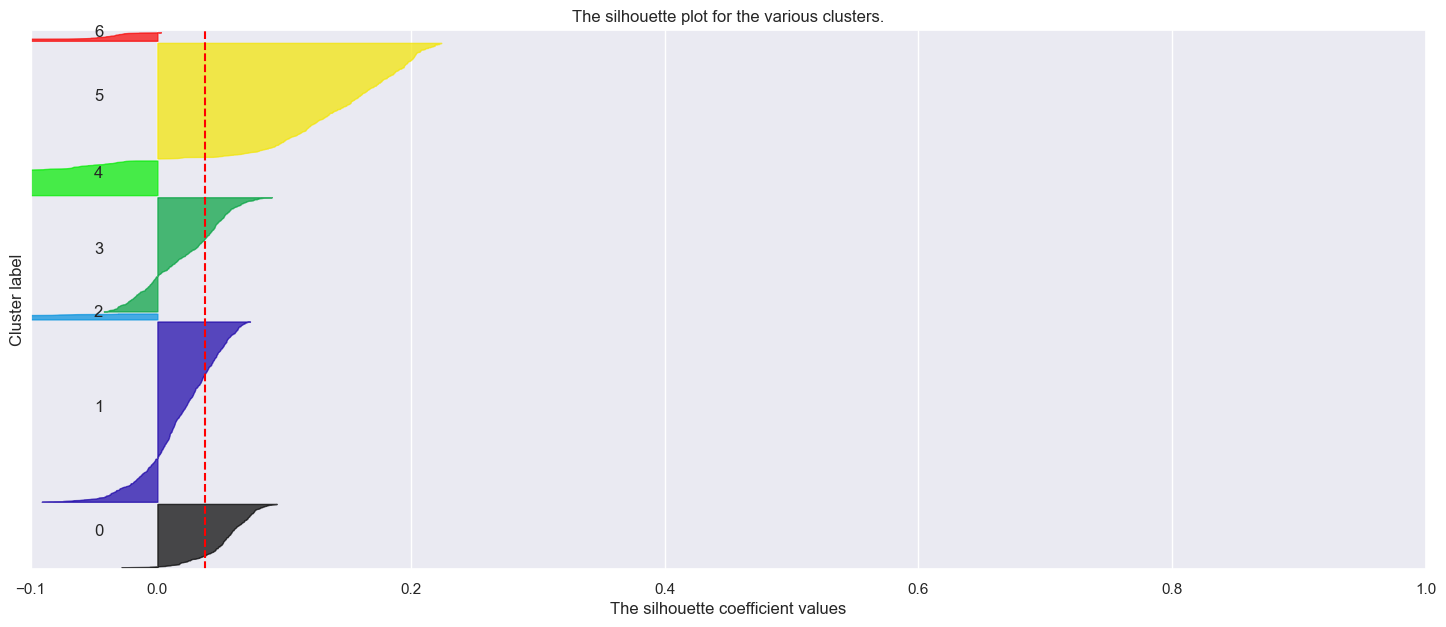

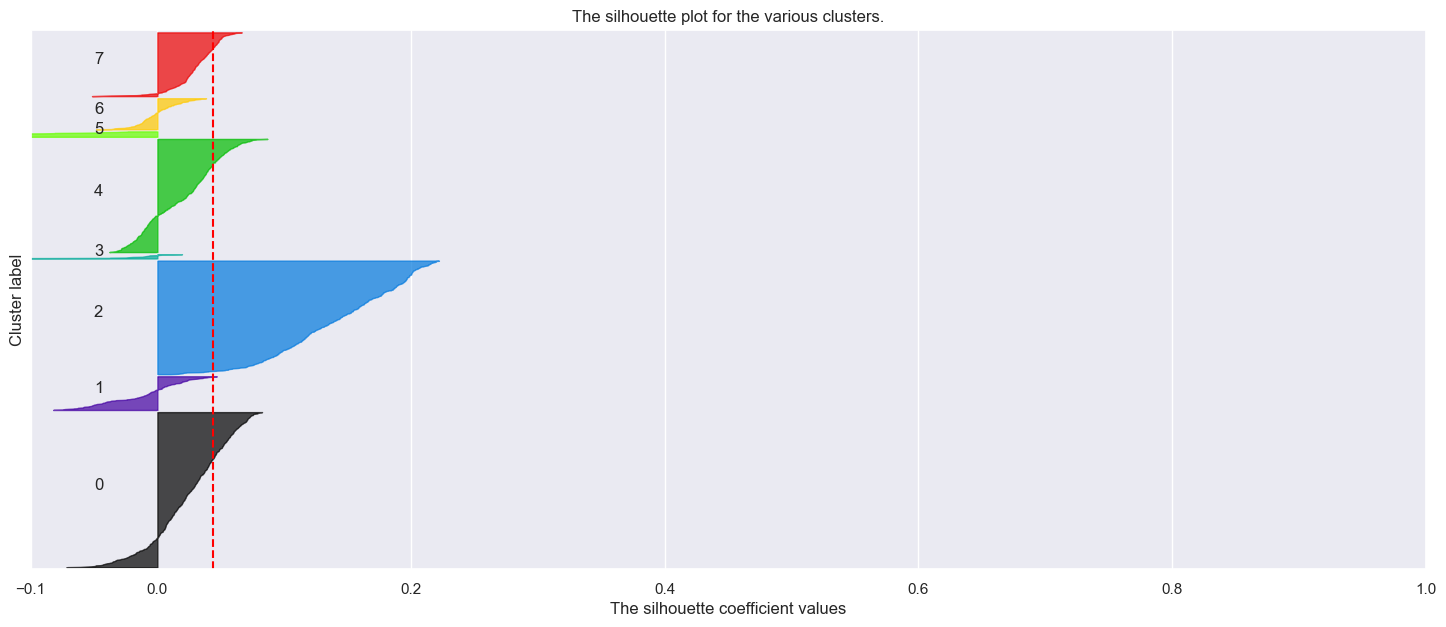

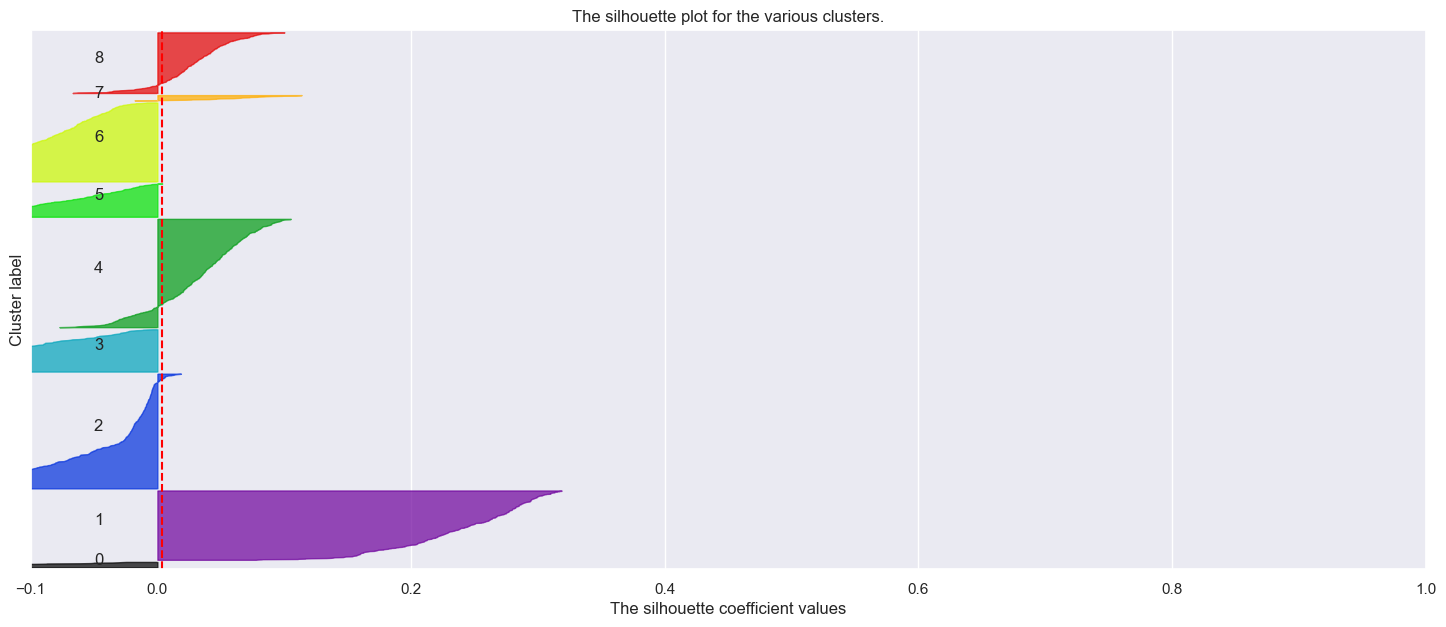

In [105]:
import matplotlib.cm as cm
potential_k = list(range(2, 10))
for n_clusters in potential_k:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_numeric_standarized) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(data_numeric_standarized)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_numeric_standarized, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_numeric_standarized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

### DBSCAN

In [106]:
# Create DBSCAN object
dbscan = DBSCAN(eps=50, min_samples=1)

# Fit model and predict clusters
labels = dbscan.fit_predict(data_numeric_standarized)

unique_labels = np.unique(labels)
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print(f'unique_labels = {unique_labels}')
print(f'Number of cluster in DBSCAN = {no_clusters}')
print(f'Number of noise in DBSCAN = {no_noise}')

# Compute silhouette score
silhouette_avg = silhouette_score(data_numeric_standarized, labels)

# Print silhouette score
print("The average silhouette score for DBSCAN with eps=50 and min_samples=1 is:", silhouette_avg)

unique_labels = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Number of cluster in DBSCAN = 25
Number of noise in DBSCAN = 0
The average silhouette score for DBSCAN with eps=50 and min_samples=1 is: 0.6216429064152031


In [125]:
# Extract the cluster centers
unique_labels = set(labels)
cluster_centers = []
for label in unique_labels:
    if label != -1:
        cluster_centers.append(data_numeric_standarized[labels == label].mean(axis=0))

# Print the number of clusters and their centers
n_clusters = len(cluster_centers)
print(f"Number of clusters found: {n_clusters}\n")
print("Cluster centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: {center}\n\n")

Number of clusters found: 25

Cluster centers:
Cluster 1: smartphone_type                         -0.003151
jobs_count                               0.003775
bike_num_days                            0.000582
survey_mode_Call center                  0.000973
survey_mode_rMove                        0.000383
                                           ...   
disability_dressing_Selected             0.001057
disability_concentrating_Not selected    0.002046
disability_concentrating_Selected       -0.000702
disability_none_Not selected             0.001314
disability_none_Selected                 0.000142
Length: 285, dtype: float64


Cluster 2: smartphone_type                          0.413289
jobs_count                              -0.690243
bike_num_days                           -1.178846
survey_mode_Call center                 -0.252213
survey_mode_rMove                        0.679305
                                           ...   
disability_dressing_Selected            -0.104355
d

## PCA

In [126]:
pca_model2 = PCA(n_components = 2)
pca_model2.fit(data_numeric_standarized)

PCA(n_components=2)

In [127]:
training_data_pca2 = pca_model2.transform(data_numeric_standarized)
centers_pca2 = pca_model2.transform(cluster_centers)

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [128]:
(training_data_pca2).shape

(2692, 2)

### Habed 1

In [142]:
pca_dataframe = pd.DataFrame(data=training_data_pca2,
                             columns=['pca1','pca2'])
pca_dataframe

,pca1,pca2
0,6.566017,1.928749
1,-2.765456,-3.313456
2,-2.750395,-1.304467
3,12.171144,-6.392696
4,-2.594898,-1.362492
...,...,...
2687,-2.508936,0.366293
2688,-2.751219,-2.924472
2689,-2.251260,-0.611768
2690,-2.421092,-2.172529


In [143]:
pca_df = pd.concat([pca_dataframe, pd.DataFrame({'cluster': labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,6.566017,1.928749,0
1,-2.765456,-3.313456,0
2,-2.750395,-1.304467,0
3,12.171144,-6.392696,1
4,-2.594898,-1.362492,0
...,...,...,...
2687,-2.508936,0.366293,0
2688,-2.751219,-2.924472,0
2689,-2.251260,-0.611768,0
2690,-2.421092,-2.172529,0


In [144]:
type(labels)

numpy.ndarray

In [145]:
unique_vals, counts = np.unique(labels, return_counts=True)

In [146]:
for val, count in zip(unique_vals, counts):
    print(f"{val}: {count}")

0: 2665
1: 3
2: 1
3: 1
4: 2
5: 1
6: 1
7: 1
8: 1
9: 1
10: 1
11: 1
12: 1
13: 1
14: 1
15: 1
16: 1
17: 1
18: 1
19: 1
20: 1
21: 1
22: 1
23: 1
24: 1


d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


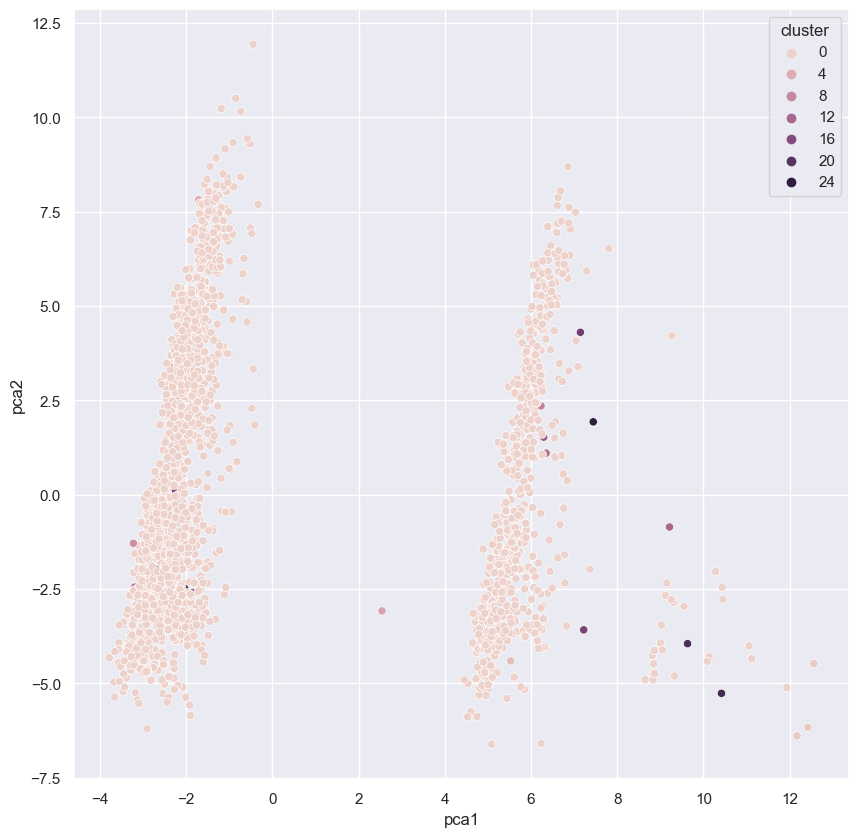

In [148]:
plt.figure(figsize=(10,10))
ax= sns.scatterplot(x="pca1", y="pca2", hue="cluster",data=pca_df, )
plt.show()

### DONE Habed

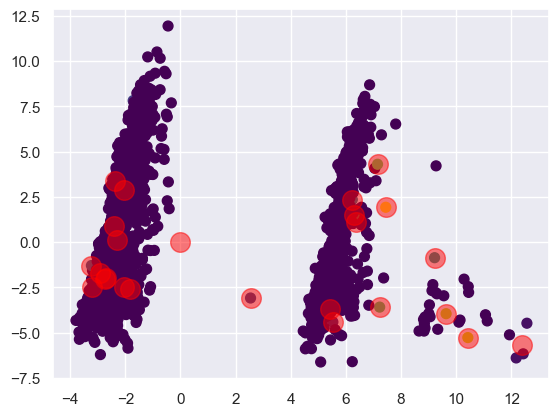

In [111]:
plt.scatter(training_data_pca2[:, 0],
            training_data_pca2[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_pca2[:, 0], centers_pca2[:, 1], c='red', s=200, alpha=0.5)

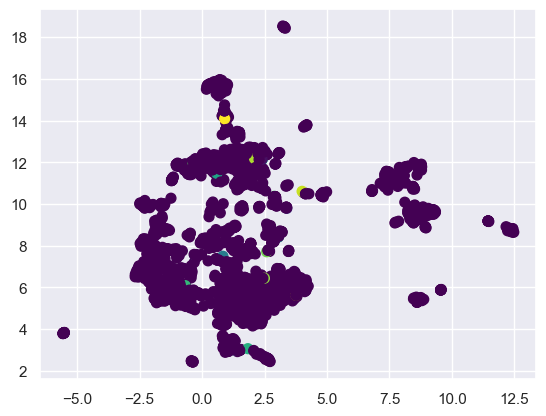

In [112]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2)
umap_model = reducer.fit(data_numeric_standarized)
training_data_embedding = umap_model.transform(data_numeric_standarized)
centers_embedding = umap_model.transform(cluster_centers)

# plot the data in the low dim with the cluster results
plt.scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=labels, s=50, cmap='viridis')
# plt.scatter(centers_embedding[:, 0], centers_embedding[:, 1], c='red', s=200, alpha=0.5)
plt.show(block=True)

* Sounds like there is another clusters behind the purple one :) !!
##### Observe not having any noise points in the clustering result, may be due to:
* the data may be well-separated, meaning that the clusters are distinct and separated by regions of low density or noise
* the DBSCAN algorithm may have identified some noise points but assigned them to a cluster if they are close enough to the points in that cluster. In such cases, the parameter values for eps and min_samples can be adjusted to control the clustering result and the number of noise points

# Hyper Parameter Tuning

finding the optimal eps, and min_samples using silhouette_score

##### **The elbow method is not applicable to DBSCAN clustering because DBSCAN does not use the WCSS metric to evaluate the clustering quality.**
##### The elbow method is a technique used in k-means clustering to find the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) against the number of clusters and selecting the number of clusters at the "elbow" of the curve, where the decrease in WCSS begins to level off. 

Best hyperparameters: eps=0.1, min_samples=4


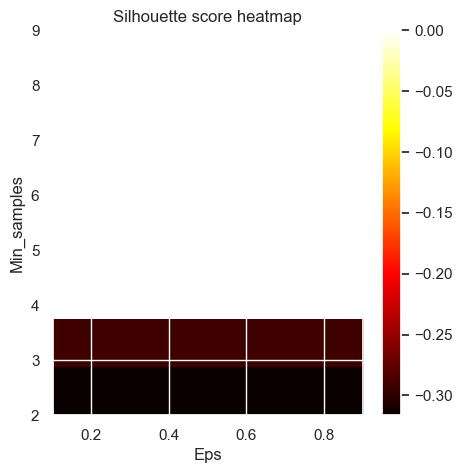

In [ ]:
# set range of hyperparameter values to try
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = np.arange(2, 10)


# initialize array to store silhouette scores
silhouette_scores = np.zeros((len(eps_range), len(min_samples_range)))

# loop over hyperparameter values and calculate silhouette scores
for indx_eps, eps in enumerate(eps_range):
    for indx_min_samples, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_numeric_standarized)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            silhouette_scores[indx_eps, indx_min_samples] = \
            silhouette_score(data_numeric_standarized, labels, metric = 'euclidean')

# plot silhouette score heatmap
plt.figure(figsize=(5, 5))
plt.title("Silhouette score heatmap")
plt.xlabel("Eps")
plt.ylabel("Min_samples")
plt.imshow(silhouette_scores.T, cmap='hot', interpolation='nearest',
           extent=[eps_range[0], eps_range[-1], 
                   min_samples_range[0], min_samples_range[-1]],
           aspect='auto', origin='lower')
plt.colorbar()

# select best hyperparameters based on evaluation metrics
best_eps_idx, best_min_samples_idx = np.unravel_index(
    np.argmax(silhouette_scores), silhouette_scores.shape)
best_eps = eps_range[best_eps_idx]
best_min_samples = min_samples_range[best_min_samples_idx]
print(f"Best hyperparameters: eps={best_eps}, min_samples={best_min_samples}")

In [158]:
# Create DBSCAN object
dbscan = DBSCAN(eps=0.1, min_samples=4)

# Fit model and predict clusters
labels = dbscan.fit_predict(data_numeric_standarized)

unique_labels = np.unique(labels)
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print(f'unique_labels = {unique_labels}')
print(f'Number of cluster in DBSCAN = {no_clusters}')
print(f'Number of noise in DBSCAN = {no_noise}')

# Compute silhouette score
silhouette_avg = silhouette_score(data_numeric_standarized, labels)

# Print silhouette score
print("The average silhouette score for DBSCAN with eps=50 and min_samples=1 is:", silhouette_avg)

unique_labels = [-1  0]
Number of cluster in DBSCAN = 2
Number of noise in DBSCAN = 2688
The average silhouette score for DBSCAN with eps=50 and min_samples=1 is: -0.20160908373765135


* Bad results!! 
* silhouette score is negative
* Only one cluster, and -1 noise!
* Next time will try other options for hyperparameters

In [159]:
# Extract the cluster centers
unique_labels = set(labels)
cluster_centers = []
for label in unique_labels:
    if label != -1:
        cluster_centers.append(data_numeric_standarized[labels == label].mean(axis=0))

# Print the number of clusters and their centers
n_clusters = len(cluster_centers)
print(f"Number of clusters found: {n_clusters}\n")
print("Cluster centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: {center}\n\n")

Number of clusters found: 1

Cluster centers:
Cluster 1: smartphone_type                         -1.888269
jobs_count                               1.449614
bike_num_days                           -1.183776
survey_mode_Call center                 -0.252213
survey_mode_rMove                       -1.472093
                                           ...   
disability_dressing_Selected            -0.104355
disability_concentrating_Not selected    0.314999
disability_concentrating_Selected       -0.163393
disability_none_Not selected            -0.361410
disability_none_Selected                 0.468191
Length: 285, dtype: float64




## PCA

In [160]:
pca_model2 = PCA(n_components = 2)
pca_model2.fit(data_numeric_standarized)

PCA(n_components=2)

In [161]:
training_data_pca2 = pca_model2.transform(data_numeric_standarized)
centers_pca2 = pca_model2.transform(cluster_centers)

d:\Data Mining\Data Mining Assignment1\DM-Assignment1-NYC-transportation\venv_DM_NYC\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


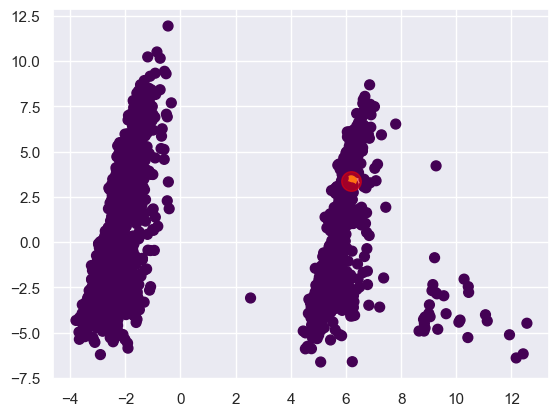

In [162]:
plt.scatter(training_data_pca2[:, 0],
            training_data_pca2[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_pca2[:, 0], centers_pca2[:, 1], c='red', s=200, alpha=0.5)

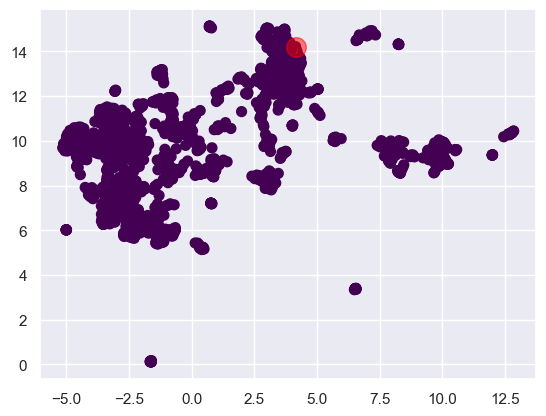

In [164]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2)
umap_model = reducer.fit(data_numeric_standarized)
training_data_embedding = umap_model.transform(data_numeric_standarized)
centers_embedding = umap_model.transform(cluster_centers)

# plot the data in the low dim with the cluster results
plt.scatter(training_data_embedding[:, 0],
            training_data_embedding[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers_embedding[:, 0], centers_embedding[:, 1], c='red', s=200, alpha=0.5)
plt.show(block=True)